In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import json
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

sns.set_theme()


**Column Names**

**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartment interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment,

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [93]:
df = pd.read_csv("kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# EDA

In [123]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [126]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

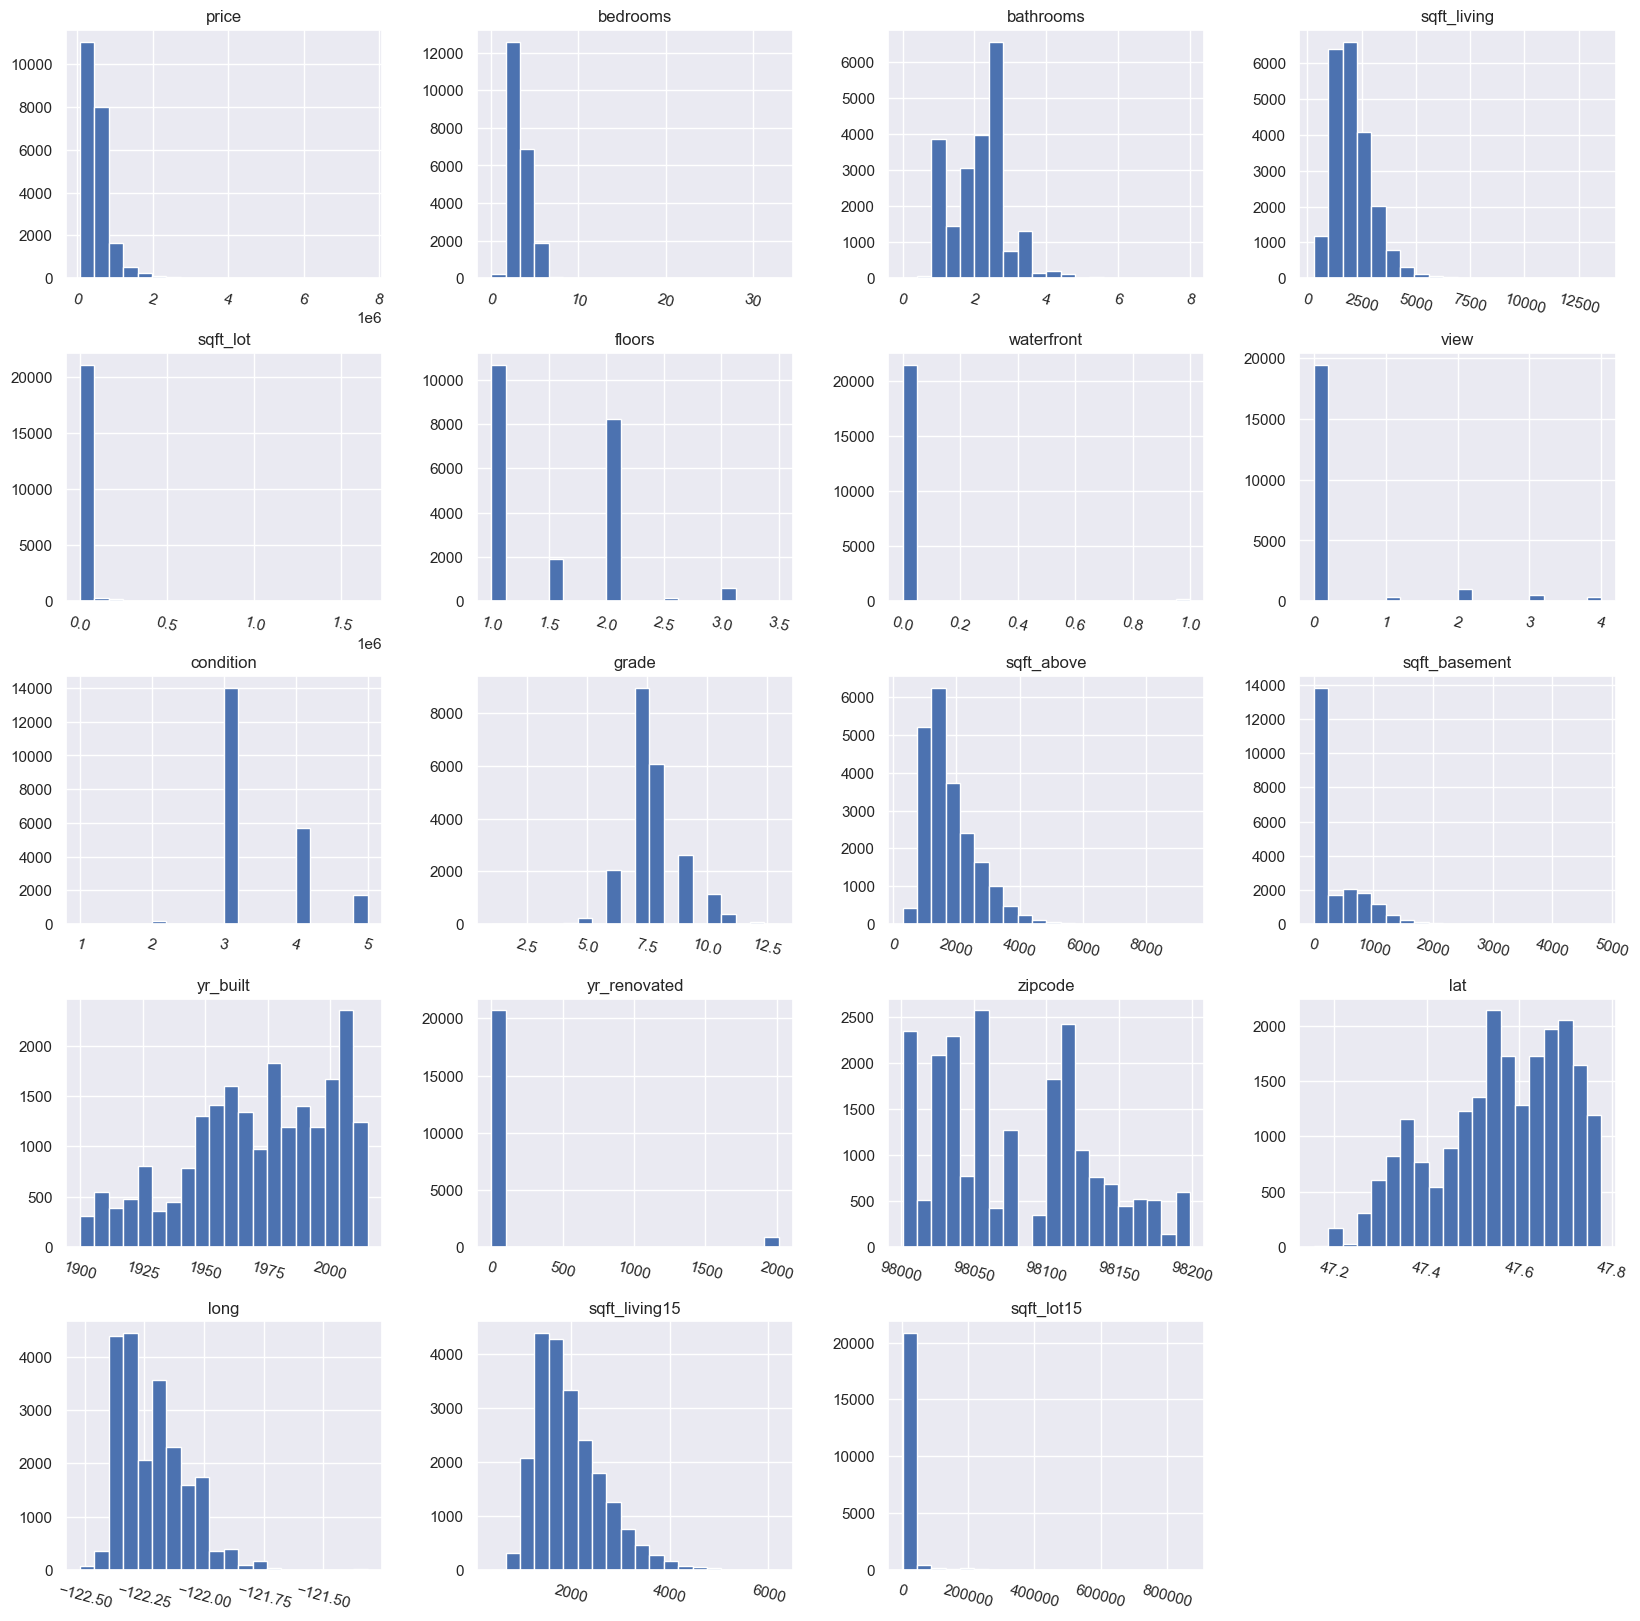

In [10]:
df1 = df[df.columns[1:]]
h = df1.hist(figsize=(20,20),xrot=-15,bins=20)


<AxesSubplot: xlabel='grade', ylabel='price'>

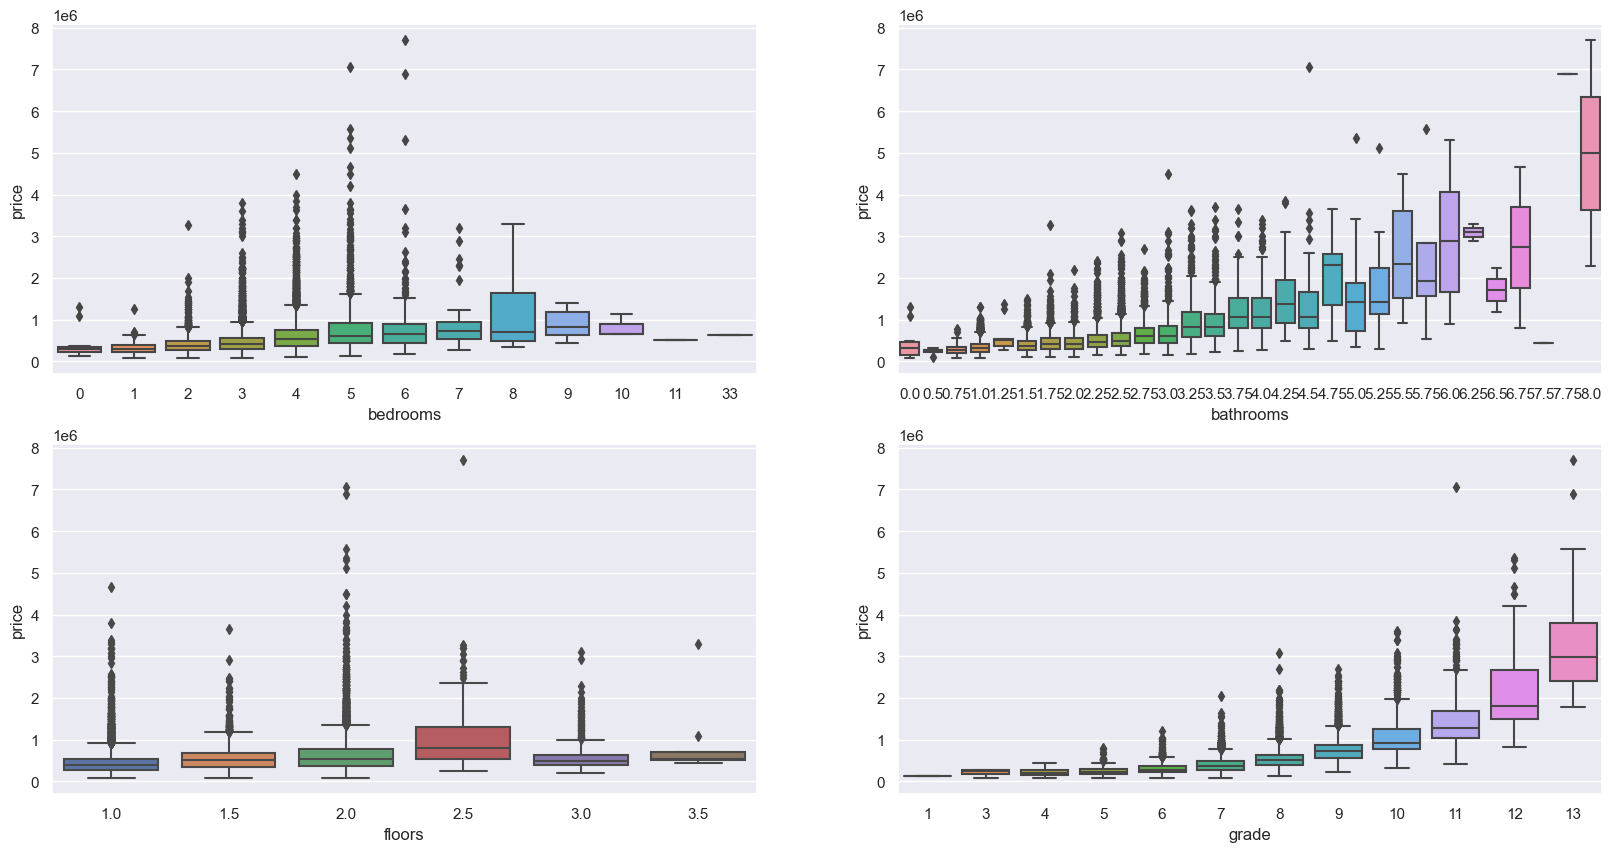

In [129]:
fg,ax = plt.subplots(2,2,figsize=(20,10))
sns.boxplot(x=df.bedrooms,y=df.price,ax=ax[0,0])
sns.boxplot(x=df.bathrooms,y=df.price,ax=ax[0,1])
sns.boxplot(x=df.floors,y=df.price,ax=ax[1,0])
sns.boxplot(x=df.grade,y=df.price,ax=ax[1,1])

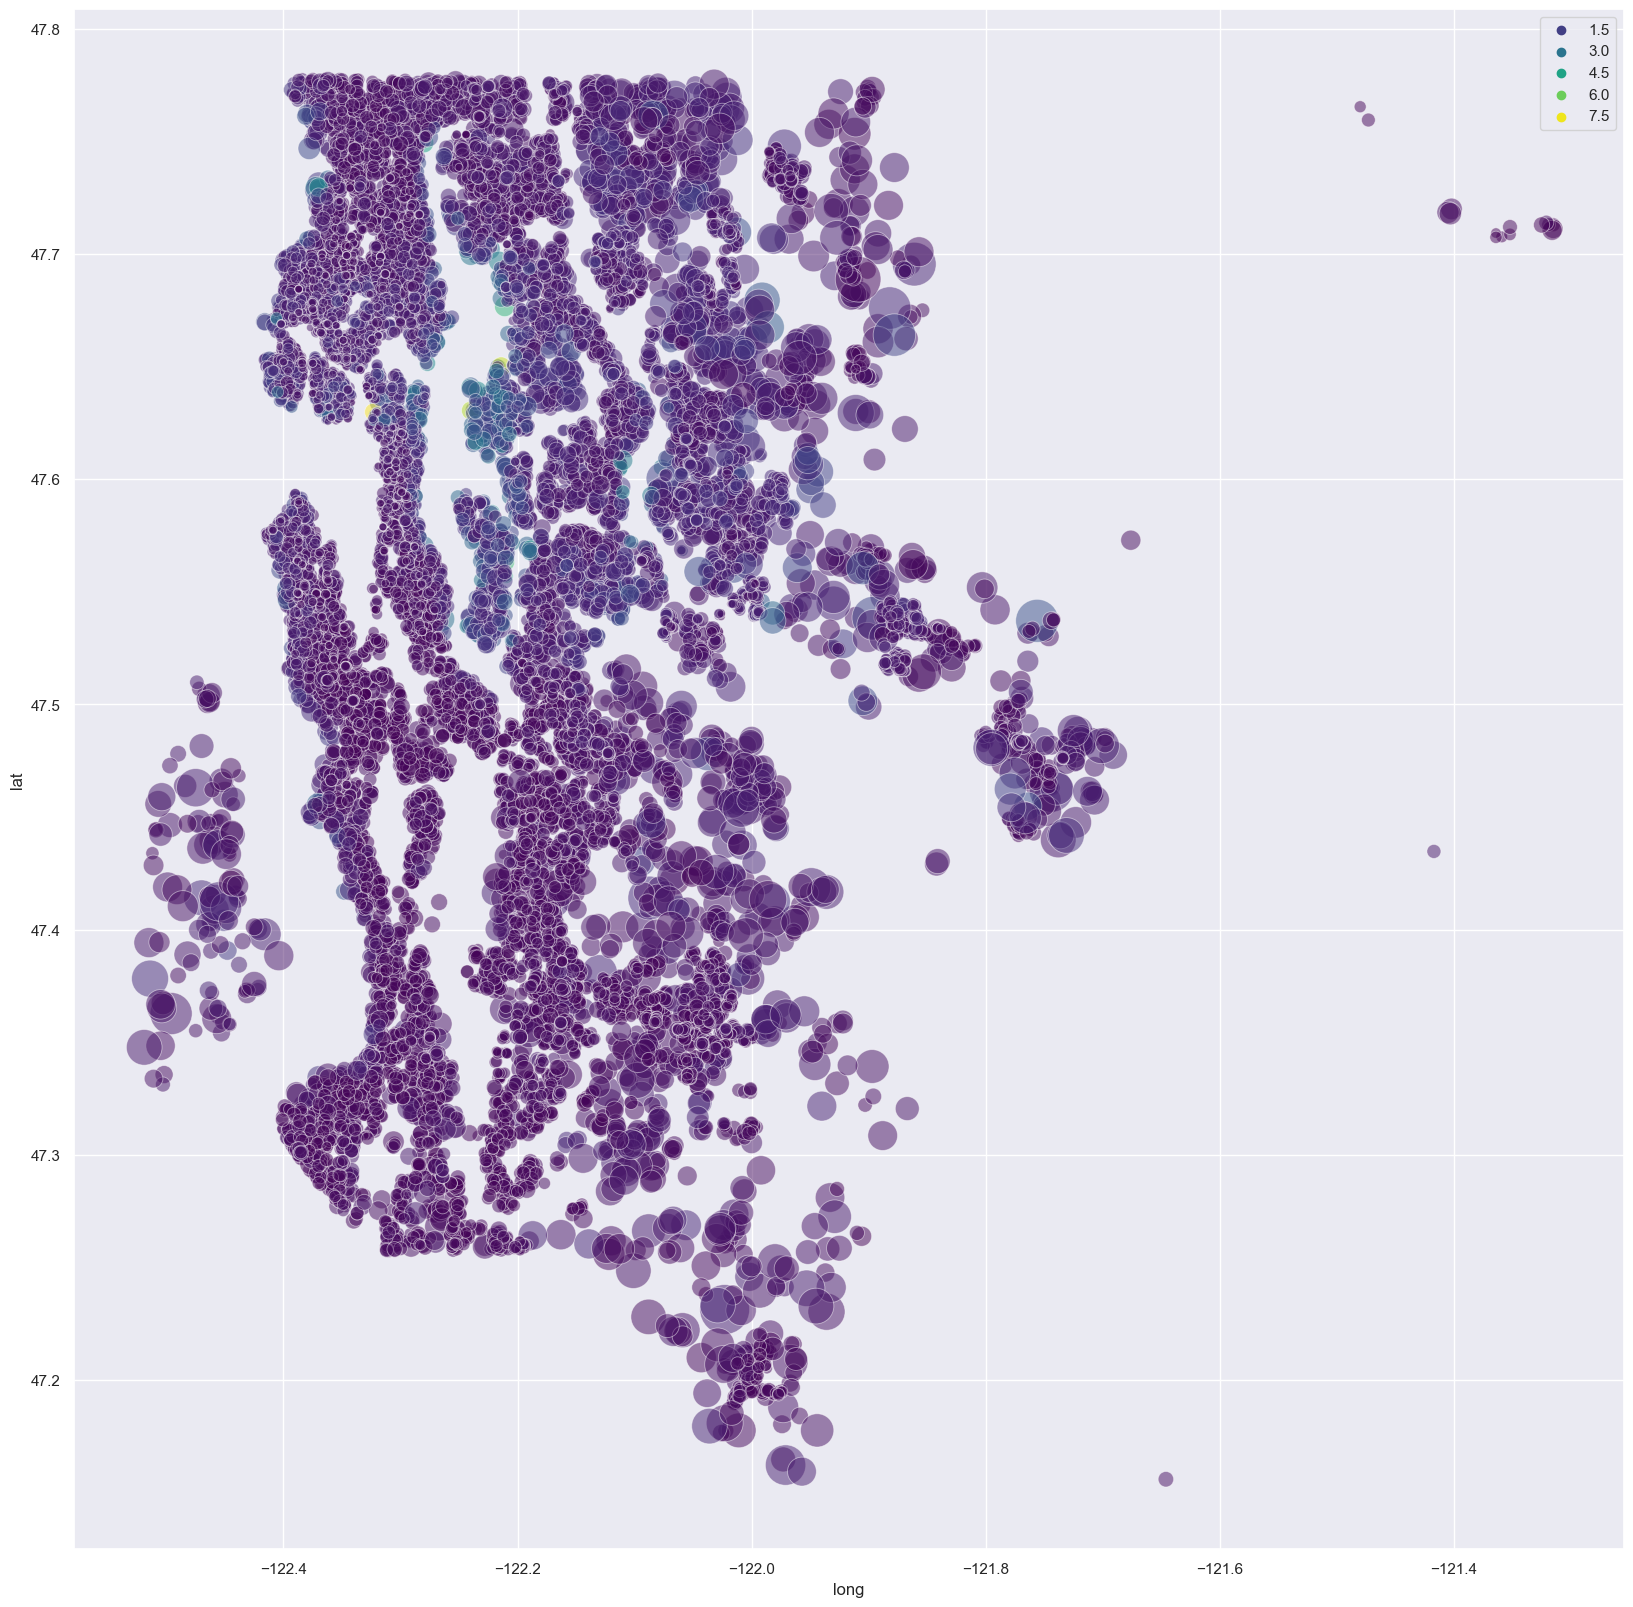

In [131]:
fg,ax = plt.subplots(figsize=(20,20))

sns.scatterplot(x=df.long,y=df.lat,palette='viridis',s=np.sqrt(df.sqft_lot),hue=df.price,alpha=0.5)
plt.legend();

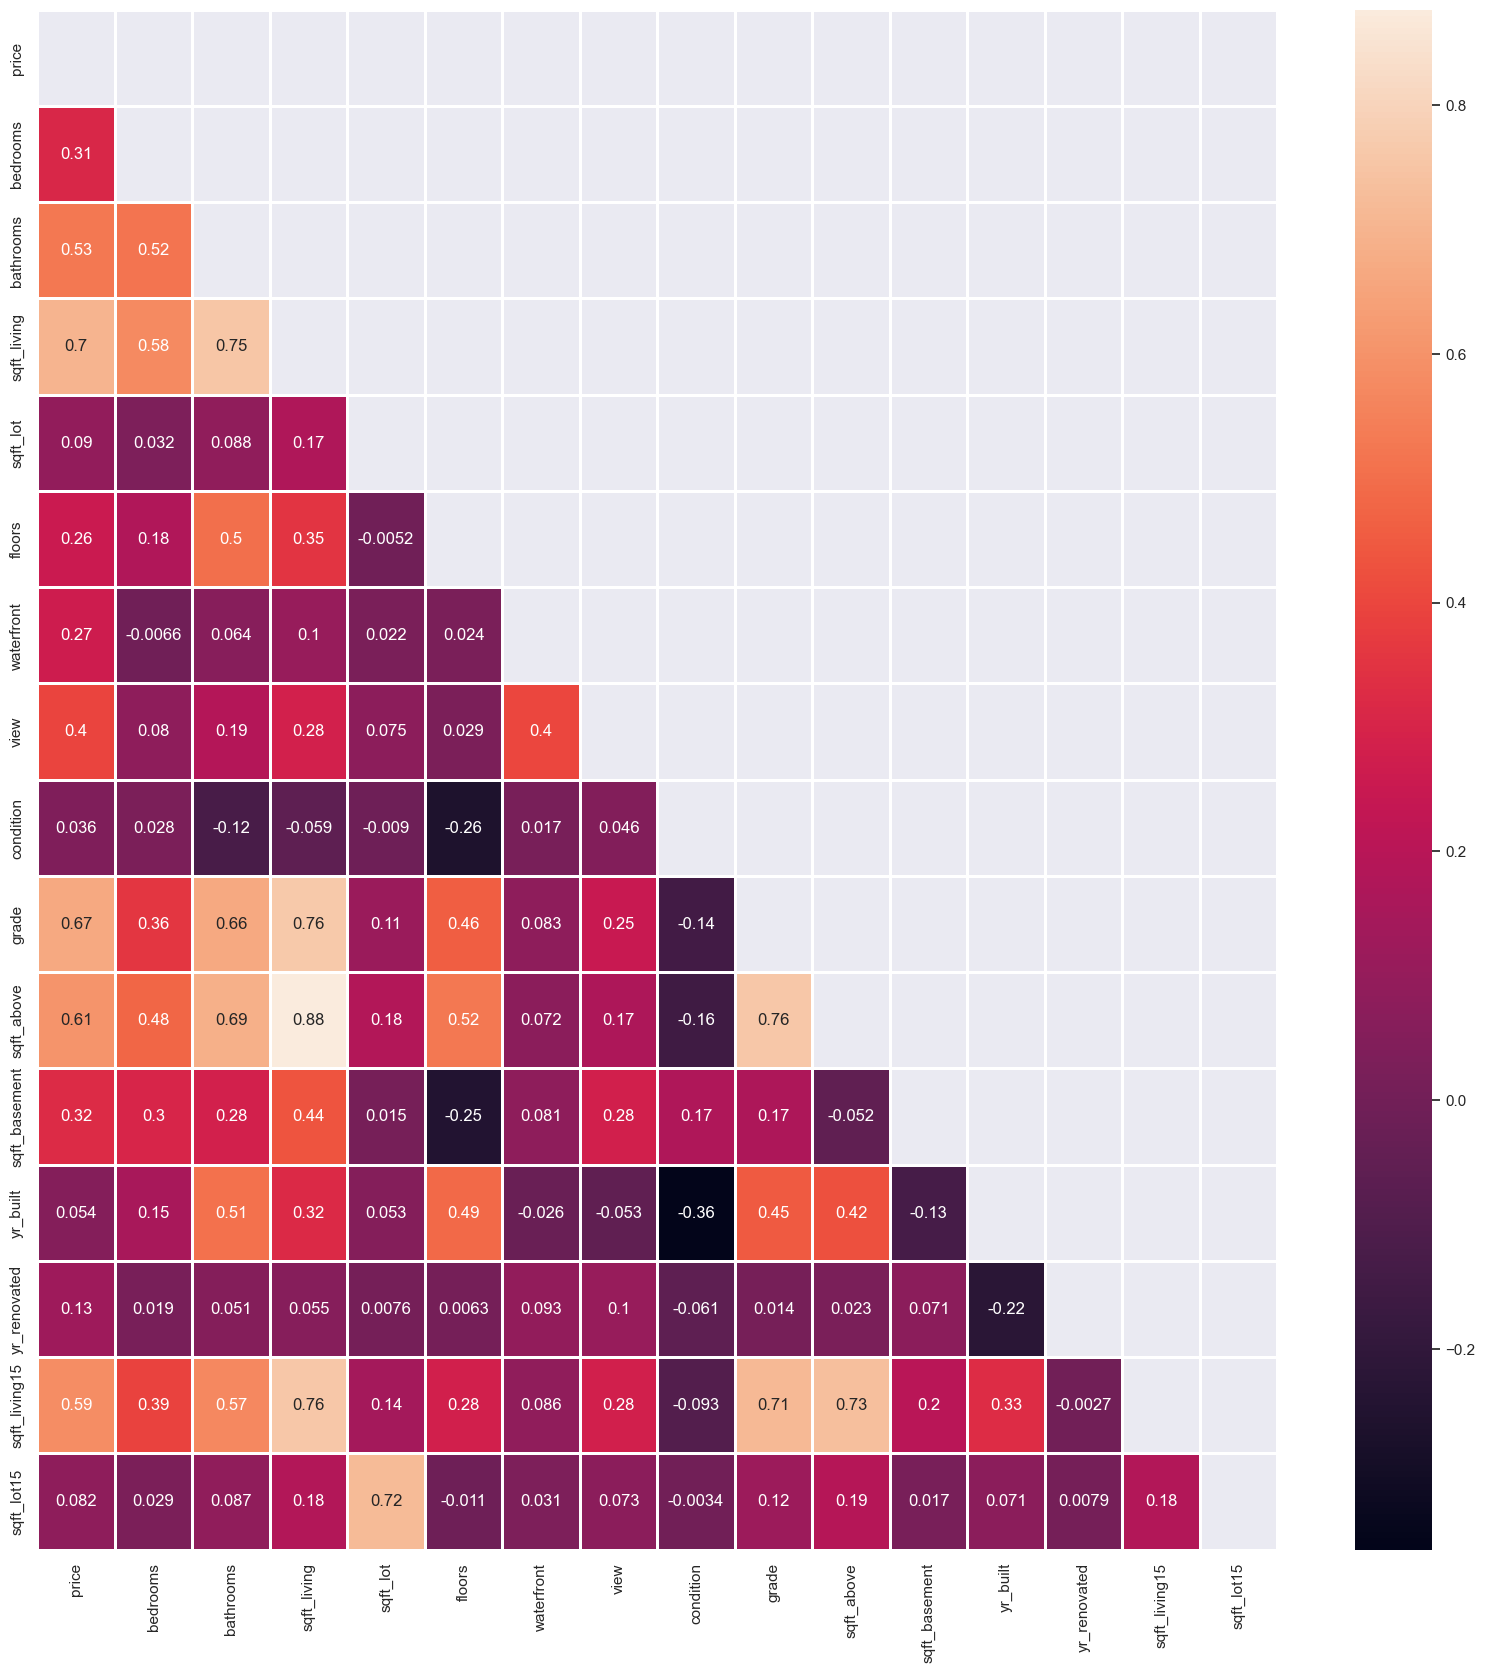

In [14]:
fg,ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] =True

sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=2);

=> mối tương quan price với sqft_living là lớn nhất

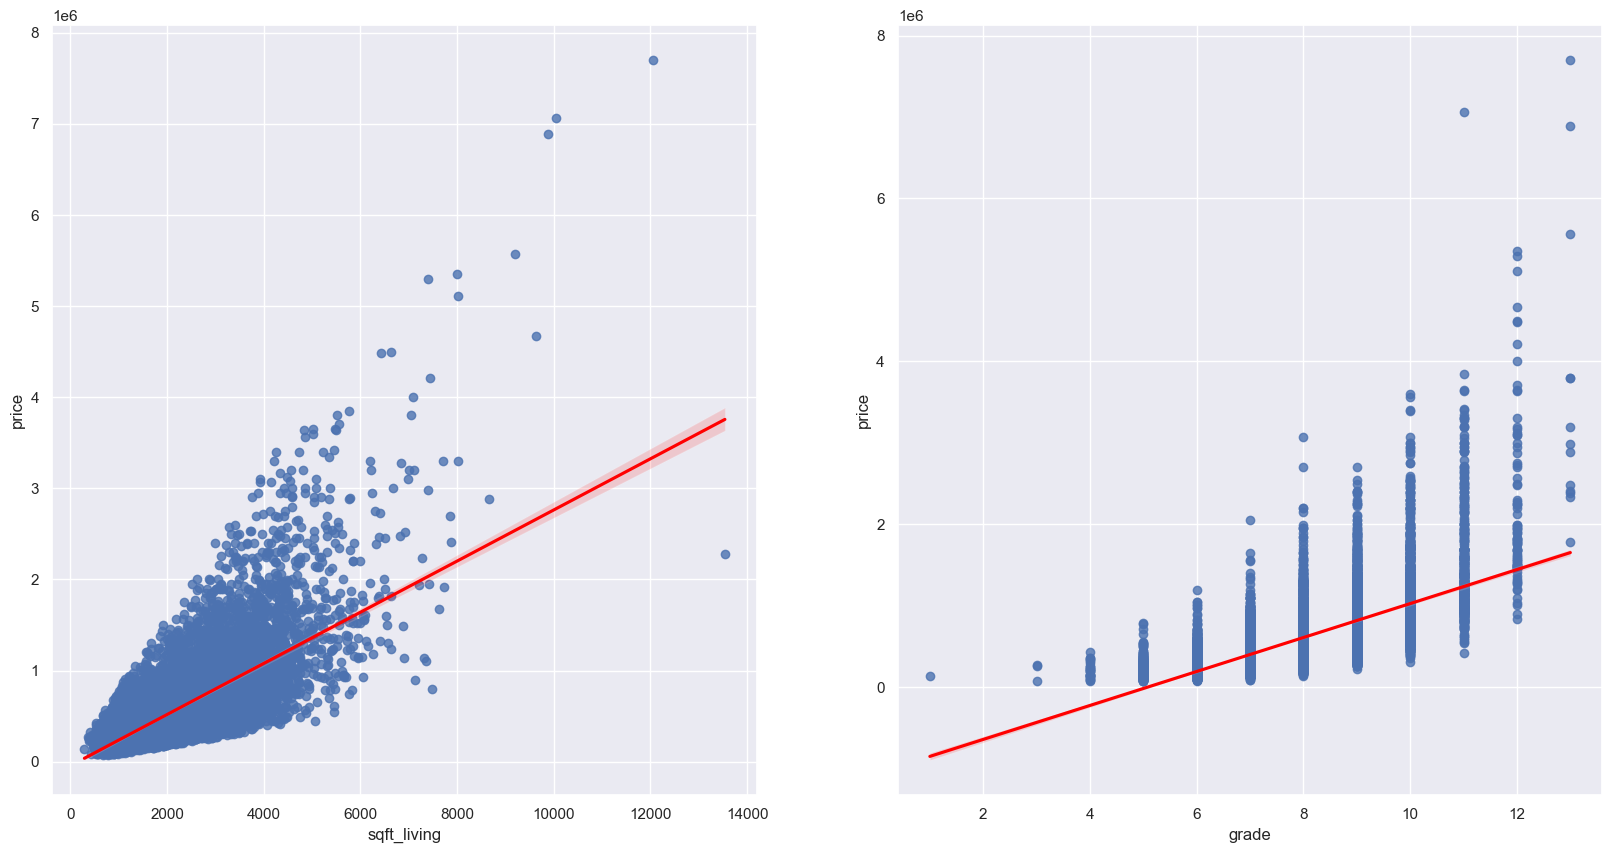

In [15]:
fg,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x=df.sqft_living,y=df.price,line_kws={'color':'red'},scatter=True,ax=ax1)
sns.regplot(x=df.grade,y=df.price,line_kws={'color':'red'},scatter=True,ax=ax2);

# Preprocessing

In [161]:
df = pd.read_csv("kc_house_data.csv")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['age'] = df['year'] - df['yr_built']
df = df.drop(labels=["date","yr_built"],axis=1)

df.head(10)

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520   221900.0         3       1.00         1180      5650     1.0   
1  6414100192   538000.0         3       2.25         2570      7242     2.0   
2  5631500400   180000.0         2       1.00          770     10000     1.0   
3  2487200875   604000.0         4       3.00         1960      5000     1.0   
4  1954400510   510000.0         3       2.00         1680      8080     1.0   
5  7237550310  1225000.0         4       4.50         5420    101930     1.0   
6  1321400060   257500.0         3       2.25         1715      6819     2.0   
7  2008000270   291850.0         3       1.50         1060      9711     1.0   
8  2414600126   229500.0         3       1.00         1780      7470     1.0   
9  3793500160   323000.0         3       2.50         1890      6560     2.0   

   waterfront  view  condition  ...  yr_renovated  zipcode      lat     long  \
0           0     0          3  ...             0    98178  47.5112 -122.257   
1           0     0          3  ...          1991    98125  47.7210 -122.319   
2           0     0          3  ...             0    98028  47.7379 -122.233   
3           0     0          5  ...             0    98136  47.5208 -122.393   
4           0     0          3  ...             0    98074  47.6168 -122.045   
5           0     0          3  ...             0    98053  47.6561 -122.005   
6           0     0          3  ...             0    98003  47.3097 -122.327   
7           0     0          3  ...             0    98198  47.4095 -122.315   
8           0     0          3  ...             0    98146  47.5123 -122.337   
9           0     0          3  ...             0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  year  month  day  age  
0           1340        5650  2014     10   13   59  
1           1690        7639  2014     12    9   63  
2           2720        8062  2015      2   25   82  
3           1360        5000  2014     12    9   49  
4           1800        7503  2015      2   18   28  
5           4760      101930  2014      5   12   13  
6           2238        6819  2014      6   27   19  
7           1650        9711  2015      1   15   52  
8           1780        8113  2015      4   15   55  
9           2390        7570  2015      3   12   12  

[10 rows x 23 columns]

## Split

In [132]:
from sklearn.model_selection import train_test_split

x = df.drop(labels='price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Feature Selection (practice)

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluate(model,x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    
    Rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    R2_score_train = r2_score(y_train, y_train_pred)
    R2_score_test = r2_score(y_test, y_test_pred)
    return Rmse, R2_score_train, R2_score_test

In [115]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector




def rate(model):
# RESET TABLE
    rate_table = pd.DataFrame({'FeatureSelection':['-'], 'Number of features': ['-']
                            ,'Rmse':['-'], 'R2 Score(train)':['-'], 'R2 Score(test)':['-']})
# Original:
    Rmse, R2_score_train, R2_score_test = evaluate(model,X_train,y_train,X_test,y_test)
    num_feats = X_train.shape[1]
    row = pd.DataFrame({'FeatureSelection': ['-'],
                                'Number of features': num_feats,'Rmse':Rmse, 'R2 Score(train)':R2_score_train, 
                                'R2 Score(test)':R2_score_test})
    rate_table = pd.concat([rate_table,row],axis = 0,ignore_index=True)
    
    print("Done original")

#varianceThreshold:
    threshold = [0.1,0.2,0.5,0.7]
    for thres in threshold:
        selector = VarianceThreshold(threshold=thres)
        x_train = selector.fit_transform(X_train)
        x_test = selector.transform(X_test)
        num_feats = x_train.shape[1]
        Rmse, R2_score_train, R2_score_test = evaluate(model,x_train,y_train,x_test,y_test)
        row = pd.DataFrame({'FeatureSelection': ['VarianceThreshold'],
                            'Number of features': num_feats,'Rmse':Rmse, 'R2 Score(train)':R2_score_train, 
                            'R2 Score(test)':R2_score_test})
        rate_table = pd.concat([rate_table,row],axis = 0,ignore_index=True)

    print("Done varianceThreshold")
    num_bests = [13,10,8,5]
    for num in num_bests:
        selection = [(["SelectKBest"],SelectKBest(score_func = f_classif, k=num)),
                     (["RFE"],RFE(model,n_features_to_select=num)),
                     (["SFS"],SequentialFeatureSelector(model,n_features_to_select=num,scoring='r2',cv=3))]
        for name, selector in selection:
            x_train = selector.fit_transform(X_train,y_train)
            x_test = selector.transform(X_test)
            num_feats = x_train.shape[1]
            Rmse, R2_score_train, R2_score_test = evaluate(model,x_train,y_train,x_test,y_test)
            row = pd.DataFrame({'FeatureSelection': name,
                                'Number of features': num_feats,'Rmse':Rmse, 'R2 Score(train)':R2_score_train, 
                                'R2 Score(test)':R2_score_test})
            rate_table = pd.concat([rate_table,row],axis = 0,ignore_index=True)
        print(f"Done num_feat = {num}")
    display(rate_table.iloc[1:].sort_values(by='R2 Score(test)',ascending=False))


In [116]:
model = LinearRegression()
rate(model)

Done original
Done varianceThreshold
Done num_feat = 13
Done num_feat = 10
Done num_feat = 8
Done num_feat = 5


FeatureSelection Number of features           Rmse R2 Score(train)  \
1                   -                 22  211995.469504        0.700861   
8                 SFS                 13  212543.074139        0.699275   
11                SFS                 10  213989.109989         0.69585   
7                 RFE                 13   214603.10367        0.694615   
6         SelectKBest                 13  216500.436355        0.691685   
14                SFS                  8  216849.226403        0.690556   
10                RFE                 10  220063.304131         0.67063   
13                RFE                  8  224997.922307        0.659279   
17                SFS                  5  225969.735326        0.667958   
9         SelectKBest                 10  226388.781328        0.655031   
12        SelectKBest                  8  227560.883701        0.653105   
2   VarianceThreshold                 19  234871.100788        0.640919   
3   VarianceThreshold                 19  234871.100788        0.640919   
4   VarianceThreshold                 16  235773.178554        0.638777   
5   VarianceThreshold                 14   242319.93219        0.615615   
16                RFE                  5      242463.45        0.604654   
15        SelectKBest                  5  261392.192191         0.54294   

   R2 Score(test)  
1        0.702718  
8         0.70118  
11       0.697101  
7         0.69536  
6        0.689949  
14        0.68895  
10       0.679661  
13       0.665133  
17       0.662234  
9         0.66098  
12       0.657461  
2          0.6351  
3          0.6351  
4        0.632291  
5        0.611587  
16       0.611127  
15        0.54804

## Scale

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


M_scaler = MinMaxScaler()
S_scaler = StandardScaler()
R_scaler = RobustScaler()

M_scaled = M_scaler.fit_transform(df)
S_scaled = S_scaler.fit_transform(df)
R_scaled = R_scaler.fit_transform(df)

# Simple Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df['sqft_living']
y = df['price']
random_state = 400
x_train, x_test, y_train, y_test = train_test_split(x.values.reshape(-1,1),y,test_size=0.2, random_state=random_state)

LR = LinearRegression()
simple_LR = LR.fit(x_train, y_train)
y_test_pred = simple_LR.predict(x_test)
y_train_pred = simple_LR.predict(x_train)

rmse_test = pd.Series(np.sqrt(mean_squared_error(y_test,y_test_pred)),index = ["RMSE score (test)"])
rmse_train = pd.Series(np.sqrt(mean_squared_error(y_train,y_train_pred)),index = ["RMSE score (train)"])
r2_test = pd.Series(r2_score(y_test,y_test_pred),index = ['r2 score (test)'])
r2_train = pd.Series(r2_score(y_train,y_train_pred),index = ['r2 score (train)'])

rate = pd.concat([rmse_test,rmse_train,r2_test,r2_train],axis=0)
print('Rate Simple Linear Regression Model:')
rate

Rate Simple Linear Regression Model:


RMSE score (test)     263711.161959
RMSE score (train)    260875.126588
r2 score (test)            0.498869
r2 score (train)           0.491268
dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df['grade']
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X.values.reshape(-1,1),y,test_size=0.2, random_state=0)

LR = LinearRegression()
simple_LR = LR.fit(x_train, y_train)
y_test_pred = simple_LR.predict(x_test)
y_train_pred = simple_LR.predict(x_train)

rmse_test = pd.Series(np.sqrt(mean_squared_error(y_test,y_test_pred)),index = ["RMSE score (test)"])
rmse_train = pd.Series(np.sqrt(mean_squared_error(y_train,y_train_pred)),index = ["RMSE score (train)"])
r2_test = pd.Series(r2_score(y_test,y_test_pred),index = ['r2 score (test)'])
r2_train = pd.Series(r2_score(y_train,y_train_pred),index = ['r2 score (train)'])

rate = pd.concat([rmse_test,rmse_train,r2_test,r2_train],axis=0)
print('Rate Simple Linear Regression Model:')
rate

Rate Simple Linear Regression Model:


RMSE score (test)     250232.175311
RMSE score (train)    278884.908695
r2 score (test)            0.473479
r2 score (train)           0.439256
dtype: float64

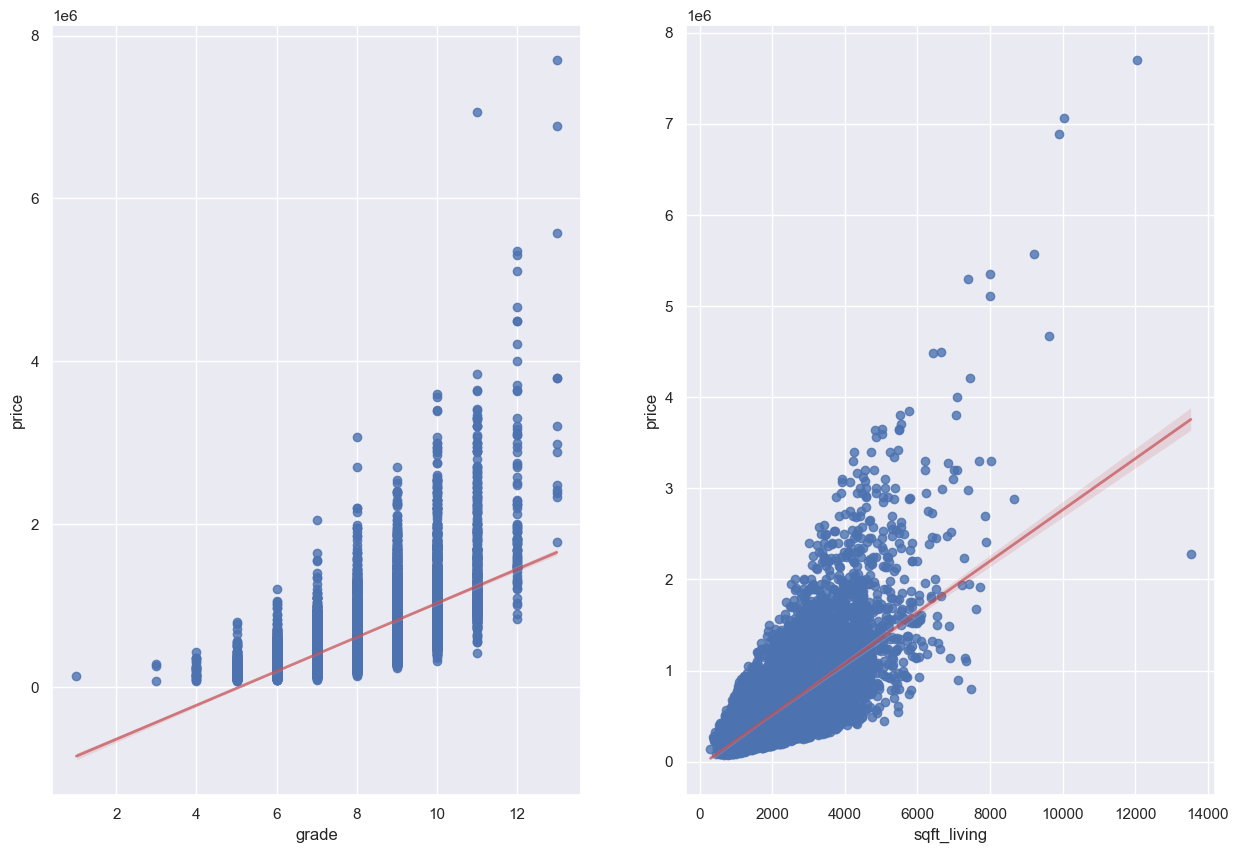

In [13]:
fg,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
sns.regplot(data=df,x=df['grade'],y=y,line_kws={'color':'r','alpha':0.7,'lw':2},ax=ax1)
sns.regplot(data=df,x=df['sqft_living'],y=y,line_kws={'color':'r','alpha':0.7,'lw':2},ax=ax2);

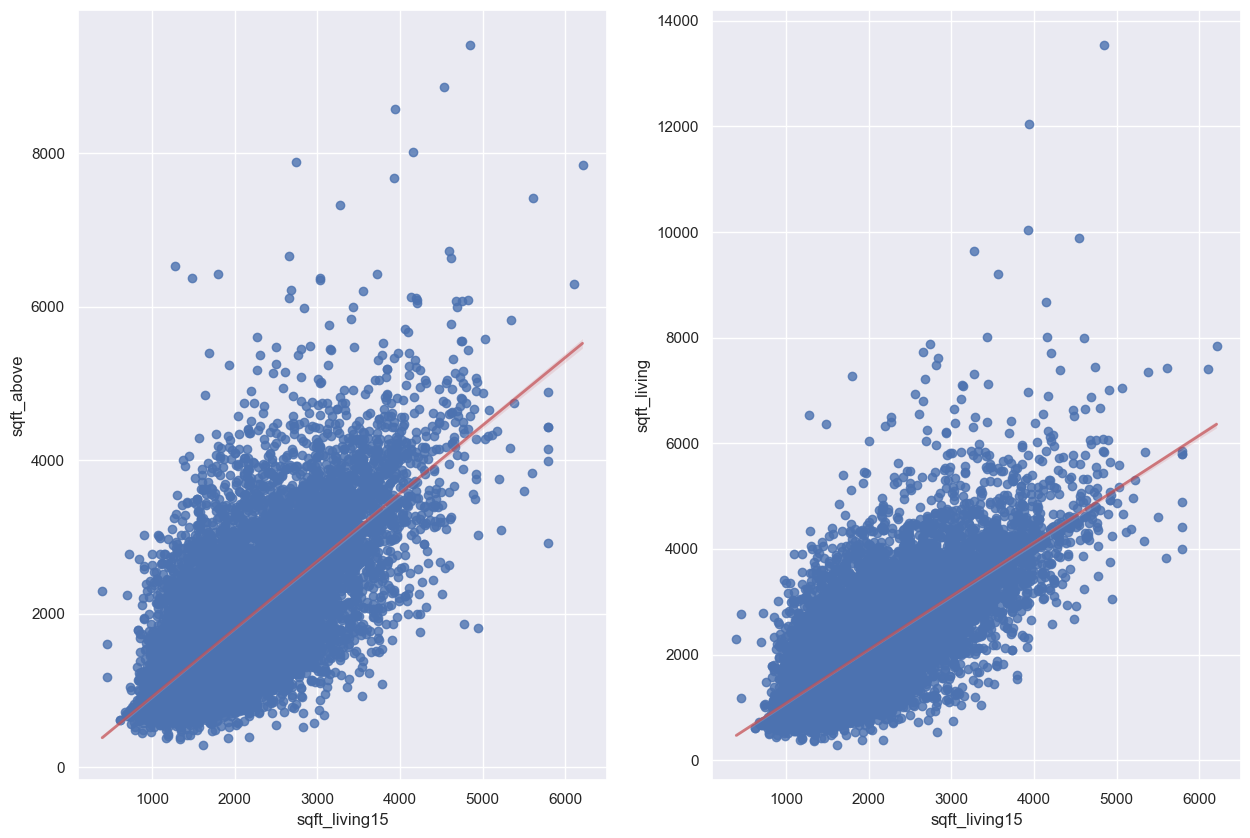

In [14]:
fg,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
sns.regplot(data=df,y=df['sqft_above'],x=df['sqft_living15'],line_kws={'color':'r','alpha':0.7,'lw':2},ax=ax1)
sns.regplot(data=df,y=df['sqft_living'],x=df['sqft_living15'],line_kws={'color':'r','alpha':0.7,'lw':2},ax=ax2);

# Define

In [8]:
df = pd.read_csv("kc_house_data.csv")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['age'] = df['year'] - df['yr_built']
df = df.drop(labels=["date","yr_built"],axis=1)

df.head(10)

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520   221900.0         3       1.00         1180      5650     1.0   
1  6414100192   538000.0         3       2.25         2570      7242     2.0   
2  5631500400   180000.0         2       1.00          770     10000     1.0   
3  2487200875   604000.0         4       3.00         1960      5000     1.0   
4  1954400510   510000.0         3       2.00         1680      8080     1.0   
5  7237550310  1225000.0         4       4.50         5420    101930     1.0   
6  1321400060   257500.0         3       2.25         1715      6819     2.0   
7  2008000270   291850.0         3       1.50         1060      9711     1.0   
8  2414600126   229500.0         3       1.00         1780      7470     1.0   
9  3793500160   323000.0         3       2.50         1890      6560     2.0   

   waterfront  view  condition  ...  yr_renovated  zipcode      lat     long  \
0           0     0          3  ...             0    98178  47.5112 -122.257   
1           0     0          3  ...          1991    98125  47.7210 -122.319   
2           0     0          3  ...             0    98028  47.7379 -122.233   
3           0     0          5  ...             0    98136  47.5208 -122.393   
4           0     0          3  ...             0    98074  47.6168 -122.045   
5           0     0          3  ...             0    98053  47.6561 -122.005   
6           0     0          3  ...             0    98003  47.3097 -122.327   
7           0     0          3  ...             0    98198  47.4095 -122.315   
8           0     0          3  ...             0    98146  47.5123 -122.337   
9           0     0          3  ...             0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  year  month  day  age  
0           1340        5650  2014     10   13   59  
1           1690        7639  2014     12    9   63  
2           2720        8062  2015      2   25   82  
3           1360        5000  2014     12    9   49  
4           1800        7503  2015      2   18   28  
5           4760      101930  2014      5   12   13  
6           2238        6819  2014      6   27   19  
7           1650        9711  2015      1   15   52  
8           1780        8113  2015      4   15   55  
9           2390        7570  2015      3   12   12  

[10 rows x 23 columns]

In [9]:
from sklearn.model_selection import train_test_split

x = df.drop(labels='price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluate(model,x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    
    Rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    R2_score_train = r2_score(y_train, y_train_pred)
    R2_score_test = r2_score(y_test, y_test_pred)
    return Rmse, R2_score_train, R2_score_test

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

scaler = ['-',MinMaxScaler(), StandardScaler(), RobustScaler()]


def rate_model(model):
    n = 45
    i = 0
    random_state = 42
    threshold = [0.05, 0.5,1]
    num_bests = [19,16,12,7]
    
# RESET TABLE
    rate_table = pd.DataFrame({'Model': ['-'],
                               'Params': ['-'],
                               'FeatureSelection':['-'] ,
                               'Scaler': ['-'],
                               'Number of features': ['-'],
                               'Rmse':['-'],
                               'R2 Score(train)':['-'],
                               'R2 Score(test)':['-']})
# Original:
    Rmse, R2_score_train, R2_score_test = evaluate(model,X_train,y_train,X_test,y_test)
    num_feats = X_train.shape[1]
    row = pd.DataFrame({'Model':model.__class__.__name__,
                        'Params': str(model.get_params()),
                        'FeatureSelection': ['-'],
                        'Scaler': ['-'],
                        'Number of features': num_feats,
                        'Rmse':Rmse,
                        'R2 Score(train)':R2_score_train, 
                        'R2 Score(test)':R2_score_test})
    rate_table = pd.concat([rate_table,row],axis = 0,ignore_index=True)
    
    sys.stdout.write("\rProgress: [{:<22}] {:.2f}%".format("=" * (i // 2), (i / n) * 100))
    i+=1
    sys.stdout.write("\rProgress: [{:<22}] {:.2f}% \tDone original!".format("=" * (i // 2), (i / n) * 100))
#varianceThreshold:
    for thres in threshold:
        selector = VarianceThreshold(threshold=thres)
        x_train = selector.fit_transform(X_train)
        x_test = selector.transform(X_test)
        num_feats = x_train.shape[1]
        for sc in scaler:
            if sc != '-':
                x_train = sc.fit_transform(x_train)
                x_test = sc.transform(x_test)
            Rmse, R2_score_train, R2_score_test = evaluate(model,x_train,y_train,x_test,y_test)
            row = pd.DataFrame({'Model':model.__class__.__name__,
                                'Params': str(model.get_params()),
                                'FeatureSelection': ['VarianceThreshold'],
                                'Scaler': sc,
                                'Number of features': num_feats,
                                'Rmse':Rmse,
                                'R2 Score(train)':R2_score_train, 
                                'R2 Score(test)':R2_score_test})
            rate_table = pd.concat([rate_table,row],axis = 0,ignore_index=True)
            sys.stdout.write("\rProgress: [{:<22}] {:.2f}%!".format("=" * (i // 2), (i / n) * 100))
            i+=1
    sys.stdout.write("\rProgress: [{:<22}] {:.2f}%\tDone varThreshold!".format("=" * (i // 2), (i / n) * 100))
    
    
#selectKbest
    for num in num_bests:
        selection = [(["SelectKBest"],SelectKBest(score_func = f_classif, k=num)),
                     #(["RFE"],RFE(model,n_features_to_select=num)),
                     (["SFS"],SequentialFeatureSelector(model,n_features_to_select=num,scoring='r2',cv=3))]
        for name, selector in selection:
            x_train = selector.fit_transform(X_train,y_train)
            x_test = selector.transform(X_test)
            num_feats = x_train.shape[1]
            for sc in scaler:
                if sc != '-':
                    x_train = sc.fit_transform(x_train)
                    x_test = sc.transform(x_test)
                Rmse, R2_score_train, R2_score_test = evaluate(model,x_train,y_train,x_test,y_test)
                row = pd.DataFrame({'Model':model.__class__.__name__,
                                    'Params': str(model.get_params()),
                                    'FeatureSelection': name,
                                    'Scaler': sc,
                                    'Number of features': num_feats,
                                    'Rmse':Rmse,
                                    'R2 Score(train)':R2_score_train, 
                                    'R2 Score(test)':R2_score_test})
                rate_table = pd.concat([rate_table,row],axis = 0,ignore_index=True)
                sys.stdout.write("\rProgress: [{:<22}] {:.2f}%".format("=" * (i // 2), (i / n) * 100))
                i+=1
        
        sys.stdout.write("\rProgress: [{:<22}] {:.2f}%\tDone num_feat = {}!".format("=" * (i // 2), (i / n) * 100,num))   
        
    rate_table = rate_table.iloc[1:].sort_values(by='R2 Score(test)',ascending=False)
    display(rate_table)
    
    
    existing_df = pd.read_csv(f'exp/{model.__class__.__name__}.csv')
    merged_df = pd.concat([existing_df, rate_table], axis=0, ignore_index=True)
    merged_df.to_csv(f'exp/{model.__class__.__name__}.csv', index=False)

# Multiple Linear Regression

In [19]:
#LinearRegression
ln_model = LinearRegression()
rate_model(ln_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
1   LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
18  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
21  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
19  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
20  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
26  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
29  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
28  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
27  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
16  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
17  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
15  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
14  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
34  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
36  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
35  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
37  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
22  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
24  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
25  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
23  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
44  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
43  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
45  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
42  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
30  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
33  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
31  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
32  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
38  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
39  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
41  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
40  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
4   LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
5   LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
3   LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
2   LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
7   LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
9   LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
8   LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
6   LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
11  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
13  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
10  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
12  LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   

     FeatureSelection            Scaler Number of features           Rmse  \
1                   -                 -                 22  211995.469504   
18                SFS                 -                 19  212084.972815   
21                SFS    RobustScaler()                 19  212084.972815   
19                SFS    MinMaxScaler()                 19  212084.972815   
20                SFS  StandardScaler()                 19  212084.972815   
26                SFS                 -                 16  212147.393731   
29                SFS    

**Conclusion**:
* SFS loại bỏ feature dựa theo chính score R2 nên lựa chọn được các feature có score cao nhất
* VarianceThreshold là tệ nhất do chưa xác định được độ quan trọng của các feature, nên chỉ loại bỏ feature dựa theo phương sai của variance
* Càng ít feature thì score càng thấp

# Support Vector Regression (SVR)

## LINEAR

In [16]:
from sklearn.svm import SVR

svr_ln_model = SVR(kernel='linear',  max_iter = 1000)
rate_model(svr_ln_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
16   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
4    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
20   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
5    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
8    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
9    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
24   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
21   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
17   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
28   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
12   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
13   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
32   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
25   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
33   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
29   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
36   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
3    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
7    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
11   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
19   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
15   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
27   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
40   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
34   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
37   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
23   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
41   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
35   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
31   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
39   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
44   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
42   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
43   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
45   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
26   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
38   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
18   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
30   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
14   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
1    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
6    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
22   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
10   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
2    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   

     FeatureSelection            Scaler Number of features  \
16        SelectKBest  StandardScaler()                 19   
4   VarianceThreshold  StandardScaler()                 19   
20                SFS  StandardScaler()                 19   
5   VarianceThreshold    RobustScaler()                 19   
8   VarianceThreshold  StandardScaler()                 16   
9   VarianceThreshold    RobustScaler()                 16   
24        SelectKBest  StandardScaler()                 16   
21                SFS    RobustScaler()                 19   
17        SelectKBest    RobustScaler()                 19   
28                SFS  StandardScaler()                 16   
12  VarianceThreshold  StandardScaler()                 13   
13  VarianceThreshold    RobustScaler()                 13   
32        SelectKBest  StandardScaler()                 12   
25        SelectKBest    RobustScaler()                 16   
33        SelectKBest    RobustScaler()                 12   
29                SFS    RobustScaler()                 16   
36                SFS  StandardScaler()           

In [93]:
from sklearn.svm import SVR

svr_ln_model = SVR(kernel='linear',epsilon = 0.1,C=100 ,max_iter = 1000)
rate_model(svr_ln_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
20   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
16   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
24   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
21   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
17   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
28   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
25   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
4    SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
32   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
8    SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
29   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
33   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
12   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
34   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
36   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
40   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
42   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
37   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
41   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
44   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
45   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
19   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
15   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
3    SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
7    SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
23   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
27   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
11   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
31   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
35   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
30   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
43   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
39   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
5    SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
13   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
9    SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
38   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
26   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
18   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
22   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
6    SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
14   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
10   SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
2    SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   
1    SVR  {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'd...   

     FeatureSelection            Scaler Number of features  \
20                SFS  StandardScaler()                 19   
16        SelectKBest  StandardScaler()                 19   
24        SelectKBest  StandardScaler()                 16   
21                SFS    RobustScaler()                 19   
17        SelectKBest    RobustScaler()                 19   
28                SFS  StandardScaler()                 16   
25        SelectKBest    RobustScaler()                 16   
4   VarianceThreshold  StandardScaler()                 19   
32        SelectKBest  StandardScaler()                 12   
8   VarianceThreshold  StandardScaler()                 16   
29                SFS    RobustScaler()                 16   
33        SelectKBest    RobustScaler()                 12   
12  VarianceThreshold  StandardScaler()                 13   
34                SFS                 -                 12   
36                SFS  StandardScaler()                 12   
40        SelectKBest  StandardScaler()                  7   
42                SFS                 -           

In [94]:
from sklearn.svm import SVR

svr_ln_model = SVR(kernel='linear',epsilon = 0.1,C=1000 ,max_iter = 1000)
rate_model(svr_ln_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
28   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
16   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
17   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
25   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
20   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
24   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
4    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
12   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
8    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
36   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
45   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
42   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
44   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
34   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
32   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
41   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
33   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
9    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
29   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
40   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
37   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
15   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
19   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
3    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
23   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
7    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
27   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
11   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
31   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
35   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
39   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
43   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
21   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
5    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
26   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
13   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
38   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
30   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
18   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
14   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
22   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
6    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
10   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
1    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
2    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   

     FeatureSelection            Scaler Number of features  \
28                SFS  StandardScaler()                 16   
16        SelectKBest  StandardScaler()                 19   
17        SelectKBest    RobustScaler()                 19   
25        SelectKBest    RobustScaler()                 16   
20                SFS  StandardScaler()                 19   
24        SelectKBest  StandardScaler()                 16   
4   VarianceThreshold  StandardScaler()                 19   
12  VarianceThreshold  StandardScaler()                 13   
8   VarianceThreshold  StandardScaler()                 16   
36                SFS  StandardScaler()                 12   
45                SFS    RobustScaler()                  7   
42                SFS                 -                  7   
44                SFS  StandardScaler()                  7   
34                SFS                 -                 12   
32        SelectKBest  StandardScaler()                 12   
41        SelectKBest    RobustScaler()                  7   
33        SelectKBest    RobustScaler()           

In [101]:
from sklearn.svm import SVR

svr_ln_model = SVR(kernel='linear',epsilon = 3000,C=1000 ,max_iter = 1000)
rate_model(svr_ln_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
16   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
28   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
20   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
17   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
24   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
25   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
4    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
12   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
45   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
42   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
8    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
33   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
44   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
41   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
32   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
34   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
40   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
36   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
15   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
37   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
3    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
23   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
19   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
7    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
27   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
11   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
31   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
35   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
29   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
39   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
43   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
9    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
21   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
18   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
5    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
13   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
38   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
30   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
26   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
10   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
6    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
22   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
14   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
2    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
1    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   

     FeatureSelection            Scaler Number of features  \
16        SelectKBest  StandardScaler()                 19   
28                SFS  StandardScaler()                 16   
20                SFS  StandardScaler()                 19   
17        SelectKBest    RobustScaler()                 19   
24        SelectKBest  StandardScaler()                 16   
25        SelectKBest    RobustScaler()                 16   
4   VarianceThreshold  StandardScaler()                 19   
12  VarianceThreshold  StandardScaler()                 13   
45                SFS    RobustScaler()                  7   
42                SFS                 -                  7   
8   VarianceThreshold  StandardScaler()                 16   
33        SelectKBest    RobustScaler()                 12   
44                SFS  StandardScaler()                  7   
41        SelectKBest    RobustScaler()                  7   
32        SelectKBest  StandardScaler()                 12   
34                SFS                 -                 12   
40        SelectKBest  StandardScaler()           

In [119]:
from sklearn.svm import SVR

svr_ln_model = SVR(kernel='linear',epsilon = 10000,C=1000 ,max_iter = 1000)
rate_model(svr_ln_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
16   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
17   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
29   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
20   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
24   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
25   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
4    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
8    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
45   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
12   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
28   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
42   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
41   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
33   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
44   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
32   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
40   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
34   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
37   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
36   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
15   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
19   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
3    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
23   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
7    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
27   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
11   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
31   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
35   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
39   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
43   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
9    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
5    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
21   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
38   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
13   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
26   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
30   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
18   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
14   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
2    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
22   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
10   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
6    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
1    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   

     FeatureSelection            Scaler Number of features  \
16        SelectKBest  StandardScaler()                 19   
17        SelectKBest    RobustScaler()                 19   
29                SFS    RobustScaler()                 16   
20                SFS  StandardScaler()                 19   
24        SelectKBest  StandardScaler()                 16   
25        SelectKBest    RobustScaler()                 16   
4   VarianceThreshold  StandardScaler()                 19   
8   VarianceThreshold  StandardScaler()                 16   
45                SFS    RobustScaler()                  7   
12  VarianceThreshold  StandardScaler()                 13   
28                SFS  StandardScaler()                 16   
42                SFS                 -                  7   
41        SelectKBest    RobustScaler()                  7   
33        SelectKBest    RobustScaler()                 12   
44                SFS  StandardScaler()                  7   
32        SelectKBest  StandardScaler()                 12   
40        SelectKBest  StandardScaler()           

In [18]:
from sklearn.svm import SVR

svr_ln_model = SVR(kernel='linear',C=1000 ,max_iter = 1000)
rate_model(svr_ln_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
28   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
16   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
17   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
25   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
20   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
24   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
4    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
12   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
8    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
36   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
45   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
42   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
44   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
34   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
32   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
41   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
33   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
9    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
29   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
40   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
37   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
15   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
19   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
3    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
23   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
7    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
27   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
11   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
31   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
35   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
39   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
43   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
21   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
5    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
26   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
13   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
38   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
30   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
18   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
14   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
22   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
6    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
10   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
1    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
2    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   

     FeatureSelection            Scaler Number of features  \
28                SFS  StandardScaler()                 16   
16        SelectKBest  StandardScaler()                 19   
17        SelectKBest    RobustScaler()                 19   
25        SelectKBest    RobustScaler()                 16   
20                SFS  StandardScaler()                 19   
24        SelectKBest  StandardScaler()                 16   
4   VarianceThreshold  StandardScaler()                 19   
12  VarianceThreshold  StandardScaler()                 13   
8   VarianceThreshold  StandardScaler()                 16   
36                SFS  StandardScaler()                 12   
45                SFS    RobustScaler()                  7   
42                SFS                 -                  7   
44                SFS  StandardScaler()                  7   
34                SFS                 -                 12   
32        SelectKBest  StandardScaler()                 12   
41        SelectKBest    RobustScaler()                  7   
33        SelectKBest    RobustScaler()           

In [120]:
from sklearn.svm import SVR

svr_ln_model = SVR(kernel='linear',C=1000 ,max_iter = 1000)
rate_model(svr_ln_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
28   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
16   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
17   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
25   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
20   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
24   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
4    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
12   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
8    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
36   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
45   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
42   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
44   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
34   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
32   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
41   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
33   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
9    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
29   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
40   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
37   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
15   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
19   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
3    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
23   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
7    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
27   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
11   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
31   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
35   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
39   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
43   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
21   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
5    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
26   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
13   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
38   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
30   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
18   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
14   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
22   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
6    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
10   SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
1    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   
2    SVR  {'C': 1000, 'cache_size': 200, 'coef0': 0.0, '...   

     FeatureSelection            Scaler Number of features  \
28                SFS  StandardScaler()                 16   
16        SelectKBest  StandardScaler()                 19   
17        SelectKBest    RobustScaler()                 19   
25        SelectKBest    RobustScaler()                 16   
20                SFS  StandardScaler()                 19   
24        SelectKBest  StandardScaler()                 16   
4   VarianceThreshold  StandardScaler()                 19   
12  VarianceThreshold  StandardScaler()                 13   
8   VarianceThreshold  StandardScaler()                 16   
36                SFS  StandardScaler()                 12   
45                SFS    RobustScaler()                  7   
42                SFS                 -                  7   
44                SFS  StandardScaler()                  7   
34                SFS                 -                 12   
32        SelectKBest  StandardScaler()                 12   
41        SelectKBest    RobustScaler()                  7   
33        SelectKBest    RobustScaler()           

In [91]:
from sklearn.svm import SVR

svr_ln_model = SVR(kernel='linear',C=3000 ,max_iter = 1000)
rate_model(svr_ln_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
16   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
42   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
29   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
17   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
45   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
15   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
19   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
23   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
27   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
3    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
12   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
7    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
34   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
44   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
25   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
31   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
11   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
37   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
8    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
41   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
35   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
39   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
43   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
4    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
40   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
21   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
20   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
36   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
28   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
24   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
33   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
13   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
18   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
38   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
9    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
32   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
26   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
5    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
30   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
1    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
6    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
22   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
14   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
2    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   
10   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 0.0, '...   

     FeatureSelection            Scaler Number of features  \
16        SelectKBest  StandardScaler()                 19   
42                SFS                 -                  7   
29                SFS    RobustScaler()                 16   
17        SelectKBest    RobustScaler()                 19   
45                SFS    RobustScaler()                  7   
15        SelectKBest    MinMaxScaler()                 19   
19                SFS    MinMaxScaler()                 19   
23        SelectKBest    MinMaxScaler()                 16   
27                SFS    MinMaxScaler()                 16   
3   VarianceThreshold    MinMaxScaler()                 19   
12  VarianceThreshold  StandardScaler()                 13   
7   VarianceThreshold    MinMaxScaler()                 16   
34                SFS                 -                 12   
44                SFS  StandardScaler()                  7   
25        SelectKBest    RobustScaler()                 16   
31        SelectKBest    MinMaxScaler()                 12   
11  VarianceThreshold    MinMaxScaler()           

In [92]:
from sklearn.svm import SVR

svr_ln_model = SVR(kernel='linear',C=10000 ,max_iter = 1000)
rate_model(svr_ln_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
29   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
27   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
31   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
15   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
23   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
16   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
35   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
3    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
11   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
42   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
19   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
39   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
7    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
9    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
21   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
43   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
34   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
44   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
12   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
20   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
33   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
36   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
17   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
24   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
37   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
28   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
41   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
5    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
18   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
4    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
8    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
25   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
13   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
40   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
45   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
32   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
26   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
38   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
30   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
6    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
14   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
2    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
10   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
1    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   
22   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 0.0, ...   

     FeatureSelection            Scaler Number of features  \
29                SFS    RobustScaler()                 16   
27                SFS    MinMaxScaler()                 16   
31        SelectKBest    MinMaxScaler()                 12   
15        SelectKBest    MinMaxScaler()                 19   
23        SelectKBest    MinMaxScaler()                 16   
16        SelectKBest  StandardScaler()                 19   
35                SFS    MinMaxScaler()                 12   
3   VarianceThreshold    MinMaxScaler()                 19   
11  VarianceThreshold    MinMaxScaler()                 13   
42                SFS                 -                  7   
19                SFS    MinMaxScaler()                 19   
39        SelectKBest    MinMaxScaler()                  7   
7   VarianceThreshold    MinMaxScaler()                 16   
9   VarianceThreshold    RobustScaler()                 16   
21                SFS    RobustScaler()                 19   
43                SFS    MinMaxScaler()                  7   
34                SFS                 -           

<font size =5>**Conclusion**:
* hằng số điều chuẩn C càng **tăng** thì hiệu suất càng tăng

## RBF

In [20]:
from sklearn.svm import SVR

svr_rbf_model = SVR(max_iter = 100)
rate_model(svr_rbf_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
5    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
9    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
13   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
23   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
7    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
15   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
3    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
19   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
11   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
27   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
18   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
35   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
26   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
34   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
42   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
29   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
31   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
39   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
21   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
38   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
30   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
36   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
37   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
1    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
14   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
2    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
22   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
6    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
10   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
12   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
41   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
8    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
4    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
28   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
33   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
40   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
32   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
17   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
25   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
16   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
20   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
43   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
45   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
24   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
44   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   

     FeatureSelection            Scaler Number of features           Rmse  \
5   VarianceThreshold    RobustScaler()                 19  747247.751059   
9   VarianceThreshold    RobustScaler()                 16  747248.283155   
13  VarianceThreshold    RobustScaler()                 13  747250.739802   
23        SelectKBest    MinMaxScaler()                 16  747251.254212   
7   VarianceThreshold    MinMaxScaler()                 16  747251.451876   
15        SelectKBest    MinMaxScaler()                 19  747252.123192   
3   VarianceThreshold    MinMaxScaler()                 19  747252.396601   
19                SFS    MinMaxScaler()                 19  747252.556865   
11  VarianceThreshold    MinMaxScaler()                 13  747252.912818   
27                SFS    MinMaxScaler()                 16  747252.986187   
18                SFS                 -                 19  747254.388273   
35                SFS    MinMaxScaler()                 12  747254.656022   
26                SFS                 -                 16  747254.749276   
34                SFS     

In [11]:
from sklearn.svm import SVR

svr_rbf_model = SVR(max_iter = 1000)
rate_model(svr_rbf_model)


Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
3    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
11   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
7    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
5    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
13   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
9    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
19   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
15   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
27   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
14   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
1    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
2    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
22   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
6    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
10   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
23   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
18   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
35   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
31   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
34   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
42   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
39   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
43   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
12   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
26   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
28   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
4    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
38   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
30   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
8    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
17   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
21   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
16   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
20   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
29   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
25   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
24   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
36   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
37   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
32   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
41   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
40   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
33   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
44   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
45   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   

     FeatureSelection            Scaler Number of features           Rmse  \
3   VarianceThreshold    MinMaxScaler()                 19  389739.667354   
11  VarianceThreshold    MinMaxScaler()                 13  389810.212756   
7   VarianceThreshold    MinMaxScaler()                 16  389933.296006   
5   VarianceThreshold    RobustScaler()                 19  389949.003777   
13  VarianceThreshold    RobustScaler()                 13  390076.210115   
9   VarianceThreshold    RobustScaler()                 16  390108.627864   
19                SFS    MinMaxScaler()                 19   390655.22763   
15        SelectKBest    MinMaxScaler()                 19  390657.091851   
27                SFS    MinMaxScaler()                 16  390663.701607   
14        SelectKBest                 -                 19  390679.925294   
1                   -                 -                 22  390679.925297   
2   VarianceThreshold                 -                 19  390679.925299   
22        SelectKBest                 -                 16  390679.925329   
6   VarianceThreshold     

<font size =5> **Conclusion**:
* hằng số điều chuẩn C càng **tăng** thì hiệu suất càng tăng
* số vòng lặp tối đa **tăng** thì hiệu suất tăng, nhưng tốn **nhiều thời gian**

## Polynomial

In [121]:
svr_poly_model = SVR(kernel="poly",max_iter = 100)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
33   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
25   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
29   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
17   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
41   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
32   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
37   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
24   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
31   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
8    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
39   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
16   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
28   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
12   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
4    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
20   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
23   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
7    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
15   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
27   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
19   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
43   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
35   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
3    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
11   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
21   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
18   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
13   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
9    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
5    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
45   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
36   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
40   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
44   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
42   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
30   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
38   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
34   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
26   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
22   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
10   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
1    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
14   SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
6    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
2    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   

     FeatureSelection            Scaler Number of features           Rmse  \
33        SelectKBest    RobustScaler()                 12  744421.091944   
25        SelectKBest    RobustScaler()                 16  745314.785174   
29                SFS    RobustScaler()                 16  745524.840548   
17        SelectKBest    RobustScaler()                 19   745645.14436   
41        SelectKBest    RobustScaler()                  7  745886.573168   
32        SelectKBest  StandardScaler()                 12  746347.886219   
37                SFS    RobustScaler()                 12  746676.189947   
24        SelectKBest  StandardScaler()                 16  746825.505484   
31        SelectKBest    MinMaxScaler()                 12  746876.792698   
8   VarianceThreshold  StandardScaler()                 16  746882.288021   
39        SelectKBest    MinMaxScaler()                  7   746935.78438   
16        SelectKBest  StandardScaler()                 19  746984.205282   
28                SFS  StandardScaler()                 16  746992.618088   
12  VarianceThreshold  Sta

In [21]:
svr_poly_model = SVR(kernel="poly", C=100, degree=3, epsilon=0.1, coef0=1,max_iter = 100)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
21   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
41   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
26   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
34   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
5    SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
24   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
17   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
42   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
28   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
40   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
9    SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
37   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
16   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
20   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
30   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
12   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
39   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
36   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
8    SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
38   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
4    SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
31   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
23   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
43   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
7    SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
15   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
11   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
19   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
3    SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
25   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
27   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
35   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
1    SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
6    SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
2    SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
10   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
22   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
14   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
18   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
32   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
33   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
13   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
45   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
29   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   
44   SVR  {'C': 100, 'cache_size': 200, 'coef0': 1, 'deg...   

     FeatureSelection            Scaler Number of features            Rmse  \
21                SFS    RobustScaler()                 19   376237.663695   
41        SelectKBest    RobustScaler()                  7   380700.734023   
26                SFS                 -                 16   389514.703534   
34                SFS                 -                 12   390014.785109   
5   VarianceThreshold    RobustScaler()                 19    434571.19459   
24        SelectKBest  StandardScaler()                 16   470294.675295   
17        SelectKBest    RobustScaler()                 19   513418.759887   
42                SFS                 -                  7   538612.883291   
28                SFS  StandardScaler()                 16    555494.82947   
40        SelectKBest  StandardScaler()                  7   578381.138049   
9   VarianceThreshold    RobustScaler()                 16   593076.215169   
37                SFS    RobustScaler()                 12   624983.034953   
16        SelectKBest  StandardScaler()                 19   627452.817804   
20          

In [22]:
# INCREASE C -> 3000
svr_poly_model = SVR(kernel="poly", C=3000, degree=3, epsilon=0.1, coef0=1,max_iter = 100)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
15   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
19   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
23   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
27   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
35   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
3    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
7    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
11   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
26   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
43   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
34   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
42   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
39   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
1    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
6    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
31   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
2    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
10   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
22   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
14   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
18   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
41   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
16   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
17   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
40   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
32   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
24   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
20   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
30   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
33   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
21   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
38   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
25   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
28   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
12   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
8    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
4    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
36   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
44   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
29   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
37   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
45   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
13   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
5    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
9    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   

     FeatureSelection            Scaler Number of features             Rmse  \
15        SelectKBest    MinMaxScaler()                 19     215823.63567   
19                SFS    MinMaxScaler()                 19    220324.503991   
23        SelectKBest    MinMaxScaler()                 16    246484.037069   
27                SFS    MinMaxScaler()                 16    246703.125429   
35                SFS    MinMaxScaler()                 12    254502.253233   
3   VarianceThreshold    MinMaxScaler()                 19    255737.446189   
7   VarianceThreshold    MinMaxScaler()                 16     263493.73911   
11  VarianceThreshold    MinMaxScaler()                 13    274292.545171   
26                SFS                 -                 16     339233.79306   
43                SFS    MinMaxScaler()                  7    419995.254578   
34                SFS                 -                 12    426128.031787   
42                SFS                 -                  7    471333.900699   
39        SelectKBest    MinMaxScaler()                  7    599185.952027  

In [23]:
# INCREASE epsilon -> 0.5
svr_poly_model = SVR(kernel="poly", C=3000, degree=3, epsilon=0.5, coef0=1,max_iter = 100)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
15   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
19   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
23   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
27   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
35   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
3    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
7    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
11   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
26   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
43   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
34   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
42   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
39   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
1    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
6    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
31   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
2    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
10   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
22   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
14   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
18   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
41   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
16   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
17   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
40   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
32   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
24   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
20   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
30   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
33   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
21   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
38   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
25   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
28   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
12   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
8    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
4    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
36   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
44   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
29   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
37   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
45   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
13   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
5    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
9    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   

     FeatureSelection            Scaler Number of features             Rmse  \
15        SelectKBest    MinMaxScaler()                 19     215823.63567   
19                SFS    MinMaxScaler()                 19    220324.503991   
23        SelectKBest    MinMaxScaler()                 16    246484.037069   
27                SFS    MinMaxScaler()                 16    246703.125429   
35                SFS    MinMaxScaler()                 12    254502.253233   
3   VarianceThreshold    MinMaxScaler()                 19    255737.446189   
7   VarianceThreshold    MinMaxScaler()                 16     263493.73911   
11  VarianceThreshold    MinMaxScaler()                 13    274292.545171   
26                SFS                 -                 16     339233.79306   
43                SFS    MinMaxScaler()                  7    419995.254578   
34                SFS                 -                 12    426128.031787   
42                SFS                 -                  7    471333.900699   
39        SelectKBest    MinMaxScaler()                  7    599185.952027  

In [24]:
# INCREASE epsilon -> 3000 = C
svr_poly_model = SVR(kernel="poly", C=3000, degree=3, epsilon=3000, coef0=1,max_iter = 100)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
19   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
15   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
27   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
23   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
3    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
7    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
11   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
35   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
26   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
43   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
34   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
42   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
39   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
1    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
6    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
2    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
10   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
22   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
14   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
18   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
31   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
45   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
28   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
16   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
17   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
44   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
40   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
41   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
29   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
32   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
24   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
20   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
37   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
30   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
33   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
36   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
21   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
38   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
25   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
12   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
8    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
4    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
13   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
5    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
9    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   

     FeatureSelection            Scaler Number of features             Rmse  \
19                SFS    MinMaxScaler()                 19    220324.503991   
15        SelectKBest    MinMaxScaler()                 19    221281.566235   
27                SFS    MinMaxScaler()                 16    240545.413055   
23        SelectKBest    MinMaxScaler()                 16    246356.427132   
3   VarianceThreshold    MinMaxScaler()                 19    255737.446189   
7   VarianceThreshold    MinMaxScaler()                 16     263493.73911   
11  VarianceThreshold    MinMaxScaler()                 13    274292.545171   
35                SFS    MinMaxScaler()                 12    319268.928209   
26                SFS                 -                 16    323194.900234   
43                SFS    MinMaxScaler()                  7    344848.295684   
34                SFS                 -                 12    439590.031079   
42                SFS                 -                  7    470538.214773   
39        SelectKBest    MinMaxScaler()                  7    540298.413064  

In [25]:
# DECREASE C, INCREASE epsilon
svr_poly_model = SVR(kernel="poly", C=300, degree=3, epsilon=10000, coef0=1,max_iter = 100)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
38   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
30   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
4    SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
39   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
31   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
34   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
23   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
26   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
18   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
7    SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
43   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
15   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
19   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
17   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
11   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
35   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
3    SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
27   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
1    SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
6    SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
37   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
2    SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
10   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
22   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
14   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
42   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
33   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
16   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
28   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
20   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
24   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
36   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
32   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
12   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
41   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
13   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
25   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
9    SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
40   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
8    SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
44   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
45   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
5    SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
29   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   
21   SVR  {'C': 300, 'cache_size': 200, 'coef0': 1, 'deg...   

     FeatureSelection            Scaler Number of features             Rmse  \
38        SelectKBest                 -                  7    320877.578919   
30        SelectKBest                 -                 12    424112.249627   
4   VarianceThreshold  StandardScaler()                 19    442417.237894   
39        SelectKBest    MinMaxScaler()                  7    474092.155285   
31        SelectKBest    MinMaxScaler()                 12    561057.032753   
34                SFS                 -                 12    637608.314552   
23        SelectKBest    MinMaxScaler()                 16     638637.21078   
26                SFS                 -                 16    642272.150446   
18                SFS                 -                 19    644166.137116   
7   VarianceThreshold    MinMaxScaler()                 16      671802.3255   
43                SFS    MinMaxScaler()                  7    676597.125814   
15        SelectKBest    MinMaxScaler()                 19    676814.121425   
19                SFS    MinMaxScaler()                 19    686329.148465  

In [26]:
# INCREASE C -> 10000
svr_poly_model = SVR(kernel="poly", C=10000, degree=3, epsilon=0.1, coef0=1,max_iter = 100)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
43   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
26   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
19   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
15   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
27   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
3    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
35   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
42   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
23   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
34   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
1    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
6    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
18   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
2    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
10   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
22   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
14   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
11   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
7    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
32   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
39   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
24   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
36   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
37   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
31   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
28   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
16   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
20   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
29   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
33   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
41   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
25   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
17   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
40   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
8    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
4    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
30   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
38   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
12   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
45   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
44   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
13   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
21   SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
5    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   
9    SVR  {'C': 10000, 'cache_size': 200, 'coef0': 1, 'd...   

     FeatureSelection            Scaler Number of features              Rmse  \
43                SFS    MinMaxScaler()                  7     287014.596673   
26                SFS                 -                 16     400338.067663   
19                SFS    MinMaxScaler()                 19     461960.008024   
15        SelectKBest    MinMaxScaler()                 19     557510.448699   
27                SFS    MinMaxScaler()                 16     562249.847009   
3   VarianceThreshold    MinMaxScaler()                 19     591277.353362   
35                SFS    MinMaxScaler()                 12     591885.163652   
42                SFS                 -                  7     597834.662646   
23        SelectKBest    MinMaxScaler()                 16     636763.374897   
34                SFS                 -                 12     652854.994151   
1                   -                 -                 22     747212.446991   
6   VarianceThreshold                 -                 16     747303.690872   
18                SFS                 -                 19     7

In [12]:
# DECREASE degree -> 2
svr_poly_model = SVR(kernel="poly", C=3000, degree=2, epsilon=0.1, coef0=1,max_iter = 100)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
20   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
24   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
16   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
36   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
41   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
40   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
28   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
34   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
44   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
30   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
45   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
39   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
17   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
26   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
25   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
31   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
38   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
23   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
7    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
15   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
19   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
35   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
3    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
11   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
43   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
27   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
33   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
42   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
32   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
18   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
1    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
2    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
10   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
14   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
22   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
6    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
4    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
8    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
12   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
13   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
29   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
9    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
37   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
5    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
21   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   

     FeatureSelection            Scaler Number of features            Rmse  \
20                SFS  StandardScaler()                 19    260519.69953   
24        SelectKBest  StandardScaler()                 16   289121.339715   
16        SelectKBest  StandardScaler()                 19   299242.819729   
36                SFS  StandardScaler()                 12   344678.388388   
41        SelectKBest    RobustScaler()                  7   348675.199699   
40        SelectKBest  StandardScaler()                  7   376969.001325   
28                SFS  StandardScaler()                 16   394724.100068   
34                SFS                 -                 12   404028.025953   
44                SFS  StandardScaler()                  7   409546.698428   
30        SelectKBest                 -                 12   421651.300826   
45                SFS    RobustScaler()                  7   439251.581139   
39        SelectKBest    MinMaxScaler()                  7   447317.140727   
17        SelectKBest    RobustScaler()                 19   460556.657425   
26          

In [13]:
# INCREASE degree -> 4
svr_poly_model = SVR(kernel="poly", C=3000, degree=4, epsilon=0.1, coef0=1,max_iter = 100)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
35   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
39   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
43   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
22   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
14   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
10   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
26   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
42   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
2    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
18   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
1    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
6    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
34   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
15   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
19   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
3    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
23   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
31   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
11   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
27   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
7    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
36   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
24   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
25   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
16   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
28   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
17   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
8    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
32   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
9    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
44   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
33   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
4    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
12   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
30   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
40   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
41   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
20   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
38   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
37   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
21   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
29   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
13   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
45   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
5    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   

     FeatureSelection            Scaler Number of features              Rmse  \
35                SFS    MinMaxScaler()                 12     360981.723858   
39        SelectKBest    MinMaxScaler()                  7     475329.452685   
43                SFS    MinMaxScaler()                  7     488093.627672   
22        SelectKBest                 -                 16     747122.266712   
14        SelectKBest                 -                 19     747130.797214   
10  VarianceThreshold                 -                 13     747168.170442   
26                SFS                 -                 16     747313.145756   
42                SFS                 -                  7     747330.444788   
2   VarianceThreshold                 -                 19     755842.128331   
18                SFS                 -                 19     755867.946947   
1                   -                 -                 22     755875.059264   
6   VarianceThreshold                 -                 16     756051.222754   
34                SFS                 -                 12     7

In [14]:
# INCREASE max_iter -> 1000
svr_poly_model = SVR(kernel="poly", C=3000, degree=3, epsilon=0.1, coef0=1,max_iter = 1000)
rate_model(svr_poly_model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
42   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
15   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
34   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
11   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
23   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
3    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
27   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
18   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
26   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
14   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
2    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
6    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
1    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
22   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
10   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
35   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
19   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
43   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
7    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
39   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
31   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
37   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
20   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
16   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
28   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
17   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
45   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
33   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
21   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
25   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
24   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
44   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
29   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
4    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
41   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
32   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
36   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
40   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
30   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
38   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
12   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
8    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
13   SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
9    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   
5    SVR  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   

     FeatureSelection            Scaler Number of features              Rmse  \
42                SFS                 -                  7     290345.810427   
15        SelectKBest    MinMaxScaler()                 19     294566.777345   
34                SFS                 -                 12     320665.522925   
11  VarianceThreshold    MinMaxScaler()                 13     347768.282076   
23        SelectKBest    MinMaxScaler()                 16     354777.000468   
3   VarianceThreshold    MinMaxScaler()                 19     366226.397036   
27                SFS    MinMaxScaler()                 16     387199.744835   
18                SFS                 -                 19     389268.327355   
26                SFS                 -                 16     390894.874936   
14        SelectKBest                 -                 19     390979.370668   
2   VarianceThreshold                 -                 19     391001.710301   
6   VarianceThreshold                 -                 16     391105.000123   
1                   -                 -                 22     3

<font size = 5> Conclusion:
* Tăng C thì hiệu suất vẫn tăng, nhưng đến 1 ngưỡng nào đó sẽ giảm
* Tăng giảm bậc đa thức thành 2 hoặc 4 đều làm giảm hiệu suất
* Tăng epsilon đến nhỏ hơn hoặc bằng C thì hiệu suất không thay đổi, khi tăng epsilon đến bằng C hoặc lớn hơn C thì hiệu suất bắt đầu giảm
* *Tăng max_iter thì hiệu suất  mô hình giảm*

## Conclusion

In [137]:
svr_df = pd.read_csv("exp/SVR.csv")
svr_df = svr_df.sort_values(by='R2 Score(test)',ascending=False)
svr_df['kernel'] = svr_df['Params'].str.extract(r"'kernel': '([^']+)'")
svr_df['C'] = svr_df['Params'].str.extract(r"'C': (\d+)")
svr_df.head()

Model FeatureSelection          Scaler  Number of features           Rmse  \
135   SVR      SelectKBest  MinMaxScaler()                  19  215823.635670   
90    SVR      SelectKBest  MinMaxScaler()                  19  215823.635670   
91    SVR              SFS  MinMaxScaler()                  19  220324.503991   
136   SVR              SFS  MinMaxScaler()                  19  220324.503991   
180   SVR              SFS  MinMaxScaler()                  19  220324.503991   

     R2 Score(train)  R2 Score(test)  \
135         0.711087        0.691885   
90          0.711087        0.691885   
91          0.685805        0.678900   
136         0.685805        0.678900   
180         0.685805        0.678900   

                                                Params kernel     C  
135  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   poly  3000  
90   {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   poly  3000  
91   {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   poly  3000  
136  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   poly  3000  
180  {'C': 3000, 'cache_size': 200, 'coef0': 1, 'de...   poly  3000

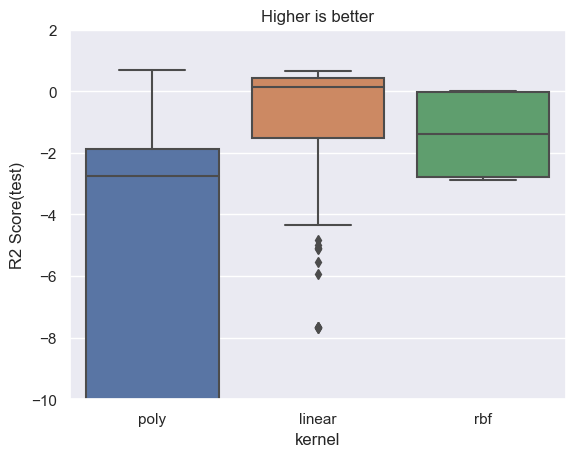

In [148]:
ax = sns.boxplot(data=svr_df,y='R2 Score(test)',x='kernel')
ax.set(ylim=(-10,2),title='Higher is better');

=> In general, Linear kernel iza bét, Poly one is unstal

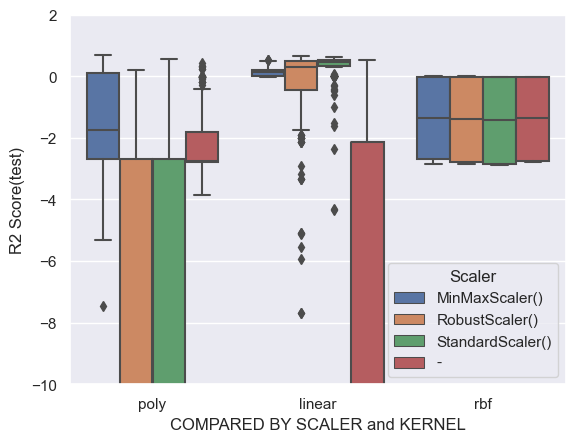

In [138]:
ax = sns.boxplot(data=svr_df,y='R2 Score(test)',x='kernel',hue='Scaler')
ax.set(ylim=(-10,2),xlabel = "COMPARED BY SCALER and KERNEL");

=> Kernel Linear thì phải áp dụng Scale để đạt hiệu suất tốt nhất

=> Kernel RBF thì Scale hay không cũng tương đương nhau

=> Kernel Poly thì nên Scale theo Minmax

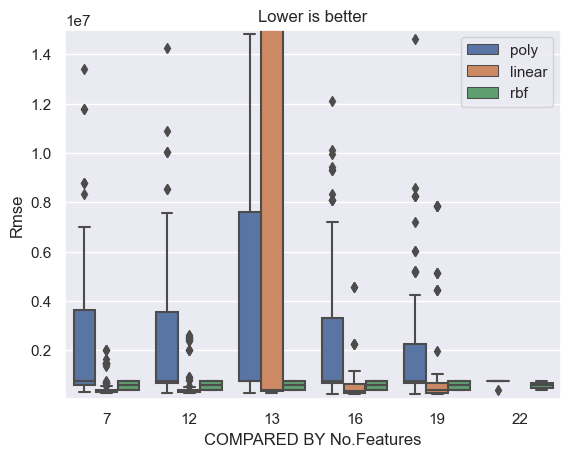

In [140]:
ax = sns.boxplot(data=svr_df,y='Rmse',x='Number of features',hue = 'kernel')
plt.legend(loc='best')
ax.set(ylim=(1e4, 1.5e7),title='Lower is better',xlabel = "COMPARED BY No.Features");

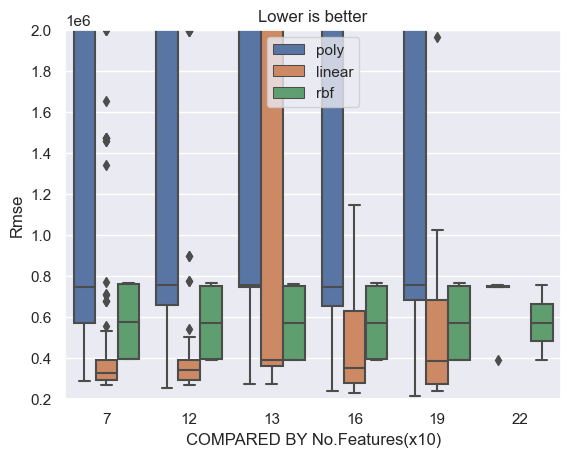

In [147]:
ax = sns.boxplot(data=svr_df,y='Rmse',x='Number of features',hue = 'kernel')
plt.legend(loc='upper center')
ax.set(ylim=(200000, 2000000),title='Lower is better',xlabel = "COMPARED BY No.Features(x10)");

=> đối với kernel RBF thì không có sự thay đổi nhiều với số lượng feature

=> kernel poly: càng ít feature thì Rmse càng cao

=> kernel linear nhìn chung dưới mức ổn 

**Detect why 13 features is *extraordinary***

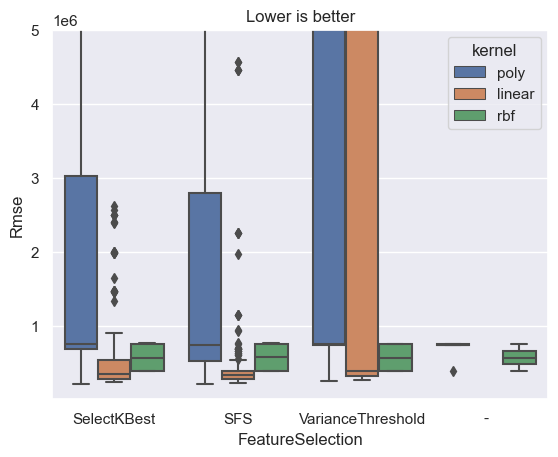

In [141]:
ax = sns.boxplot(data=svr_df,y='Rmse',x='FeatureSelection',hue = 'kernel')
ax.set(ylim=(1e4, 0.5e7),title='Lower is better');

=> VarianceThreshold tệ nhất

=> SFS và SelectKBest tương đương nhau, một 9 một 10

# Decision Tree

DecisionTreeRegressor(criterion="mse",splitter="best",max_depth='None',min_samples_split='2',min_samples_leaf='1'
                      max_features='None',max_leaf_node='None')
               
* **criterion**: phép đo lường chất lượng của sự chia tách ở mỗi cây ("mse","mae",...)
* **splitter**: Xác định cách chọn nút chia tách ở mỗi bước."best" là chọn cách chia tốt nhất,"random" là chọn cách chia ngẫu nhiên
* **max_depth**: giới hạn độ sâu tối đa của cây
* **min_samples_split**: số lượng mẫu tối thiểu cần thiết để chia một nút nếu nó có thể được chia, nếu một nút có ít hơn min_smaples_split mẫu, nó sẽ không được chia
* **min_samples_leaf**: Số lượng mẫu tối thiểu cần thiết để tạo một nút lá.Nếu nút lá có ít hơn min_samples_leaf mẫu, cây có thể sẽ không tạo ra nút lá đó => tham số này ảnh hưởng đến độ mượt của mô hình
* **max_features**: số lượng đặc trưng tối đa mà mô hình cân nhắc khi tìm kiếm sự chia tách tốt nhất ở mỗi nút
* **max_leaf_node**: giới hạn số lượng nút lá tối đa trong cây


## Exp

In [37]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
19                SFS    MinMaxScaler()                 19  211282.259187   
43                SFS    MinMaxScaler()                  7  213734.736345   
23        SelectKBest    MinMaxScaler()                 16  214639.554559   
14        SelectKBest          

In [149]:
# INCREASE max_depth -> 10
model = DecisionTreeRegressor(max_depth=10,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
14        SelectKBest                 -                 19  173985.442858   
17        SelectKBest    RobustScaler()                 19  178411.579034   
15        SelectKBest    MinMaxScaler()                 19  178471.543453   
43                SFS    MinMax

In [123]:
# INCREASE max_depth -> 15
model = DecisionTreeRegressor(max_depth=15,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
16        SelectKBest  StandardScaler()                 19   188468.77429   
37                SFS    RobustScaler()                 12  188530.543574   
34                SFS                 -                 12  188649.457205   
35                SFS    MinMax

In [124]:
# min_samples_split ->3
model = DecisionTreeRegressor(max_depth=10,min_samples_split=3,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
43                SFS    MinMaxScaler()                  7  176473.029975   
45                SFS    RobustScaler()                  7  176473.963724   
42                SFS                 -                  7  176487.131988   
44                SFS  Standard

In [125]:
# INCREASE min_samples_split ->5
model = DecisionTreeRegressor(max_depth=10,min_samples_split = 5,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
43                SFS    MinMaxScaler()                  7   175875.33568   
44                SFS  StandardScaler()                  7  176133.272332   
42                SFS                 -                  7  176174.030356   
45                SFS    Robust

In [126]:
# min_samples_leaf = 2
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10,min_samples_leaf = 2,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
43                SFS    MinMaxScaler()                  7  176934.402287   
42                SFS                 -                  7  176948.467531   
44                SFS  StandardScaler()                  7    176958.5535   
45                SFS    Robust

In [127]:
# INCREASE min_samples_leaf -> 3
model = DecisionTreeRegressor(max_depth=10,min_samples_leaf = 3,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
17        SelectKBest    RobustScaler()                 19  175726.388844   
16        SelectKBest  StandardScaler()                 19  175744.356174   
14        SelectKBest                 -                 19  175746.365014   
15        SelectKBest    MinMax

In [128]:
# INCREASE min_samples_leaf -> 5
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10,min_samples_leaf = 5,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
35                SFS    MinMaxScaler()                 12   176320.71315   
37                SFS    RobustScaler()                 12  176428.980913   
43                SFS    MinMaxScaler()                  7  176484.736046   
45                SFS    Robust

In [129]:
# INCREASE min_samples_leaf -> 10
model = DecisionTreeRegressor(max_depth=10,min_samples_leaf = 10,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
37                SFS    RobustScaler()                 12  178857.615628   
36                SFS  StandardScaler()                 12  178897.445668   
35                SFS    MinMaxScaler()                 12  178897.445668   
34                SFS          

In [130]:
# 15,20
model = DecisionTreeRegressor(max_depth=10,min_samples_leaf = 15,min_samples_split=20,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
45  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
43  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
44  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
42  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
21  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
18  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
19  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
20  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
37  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
35  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
36  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
34  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
29  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
26  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
27  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
28  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
24  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
25  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
22  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
23  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
1   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
17  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
14  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
16  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
15  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
32  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
33  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
30  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
31  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
39  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
41  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
40  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
38  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
11  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
12  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
10  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
13  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
8   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
7   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
9   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
6   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
4   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
3   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
5   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2   DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   

     FeatureSelection            Scaler Number of features           Rmse  \
45                SFS    RobustScaler()                  7  190259.756152   
43                SFS    MinMaxScaler()                  7  190300.502184   
44                SFS  StandardScaler()                  7  190304.228643   
42                SFS          

## GridsearchCV
là một kỹ thuật **quan trọng** để tìm kiếm **tập hợp các giá trị tham số tốt nhất** cho mô hình dự đoán thông qua kiểm định chéo.
* Tạo ra, đánh giá các phiên bản khác nhau của mô hình với các giá trị tham số khác nhau để tìm ra bộ tham số tối ưu
* Sử dụng cv(cross-validation) để đánh giá hiệu suất mô hình với mỗi bộ tham số


In [38]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình
model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10,20,30],
    'min_samples_split': [None,20,30,40],
    'min_samples_leaf' : [None,2,3,4,5,6]
}

# Tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,scoring = 'r2',n_jobs=5)

# Fit mô hình
grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
67       0.140800      0.001939         0.003199    3.991366e-04   
91       0.156599      0.010326         0.003800    1.166164e-03   
19       0.143799      0.001167         0.003201    4.006629e-04   
15       0.145601      0.001624         0.003400    4.907008e-04   
63       0.145600      0.001361         0.003000    6.975526e-07   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
67              20                      5                      40   
91              30                      5                      40   
19            None                      5                      40   
15            None                      4                      40   
63              20                      4                      40   

                                               params  split0_test_score  \
67  {'max_depth': 20, 'min_samples_leaf': 5, 'min_...           0.817904   
91  {'max_depth': 30, 'min_samples_leaf': 5, 'min_...           0.817952   
19  {'max_depth': None, 'min_samples_leaf': 5, 'mi...           0.817829   
15  {'max_depth': None, 'min_samples_leaf': 4, 'mi...           0.818880   
63  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...           0.818832   

    split1_test_score  split2_test_score  split3_test_score  \
67           0.787651           0.804382           0.806648   
91           0.787574           0.804344           0.806457   
19           0.787542           0.804382           0.806527   
15           0.786508           0.798532           0.800631   
63           0.786399           0.798584           0.800733   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
67           0.767767         0.796870        0.017472                1  
91           0.767767         0.796819        0.017468                2  
19           0.767767         0.796809        0.017452                3  
15           0.770311         0.794972        0.016100                4  
63           0.770264         0.794962        0.016121                5

In [415]:
#BEST
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(min_samples_leaf = 5,min_samples_split=40,random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
36  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
35  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
27  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
28  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
34  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
37  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
45  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
43  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
29  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
26  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
44  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
42  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
1   DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
18  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
21  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
20  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
19  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
15  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
17  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
16  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
14  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
22  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
25  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
24  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
23  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
31  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
33  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
32  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
30  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
39  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
40  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
38  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
41  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
8   DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
6   DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
9   DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
7   DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
10  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
4   DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
12  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
13  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
5   DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
2   DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
3   DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
11  DecisionTreeRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   

     FeatureSelection            Scaler Number of features           Rmse  \
36                SFS  StandardScaler()                 12  172176.646632   
35                SFS    MinMaxScaler()                 12  172178.244291   
27                SFS    MinMaxScaler()                 16  172390.912901   
28                SFS  Standard

## Conclusion

In [31]:
DT_df = pd.read_csv("exp/DecisionTreeRegressor.csv")
clean_DT_df = DT_df.drop_duplicates()
clean_DT_df.sort_values(by='R2 Score(test)',ascending=False)
clean_DT_df['min_samples_split'] = clean_DT_df['Params'].str.extract(r"'min_samples_split': (\d+)")
clean_DT_df['min_samples_leaf'] = clean_DT_df['Params'].str.extract(r"'min_samples_leaf': (\d+)")
clean_DT_df['overfitting'] = clean_DT_df['R2 Score(train)']/clean_DT_df['R2 Score(test)']
clean_DT_df = clean_DT_df.drop('Params', axis=1)
clean_DT_df.sort_values(by='R2 Score(test)',ascending=False)

Model   FeatureSelection            Scaler  \
450  DecisionTreeRegressor                SFS  StandardScaler()   
451  DecisionTreeRegressor                SFS    MinMaxScaler()   
495  DecisionTreeRegressor                SFS    MinMaxScaler()   
452  DecisionTreeRegressor                SFS    MinMaxScaler()   
496  DecisionTreeRegressor                SFS  StandardScaler()   
..                     ...                ...               ...   
764  DecisionTreeRegressor  VarianceThreshold    MinMaxScaler()   
133  DecisionTreeRegressor  VarianceThreshold                 -   
718  DecisionTreeRegressor  VarianceThreshold                 -   
719  DecisionTreeRegressor  VarianceThreshold    MinMaxScaler()   
134  DecisionTreeRegressor  VarianceThreshold  StandardScaler()   

     Number of features           Rmse  R2 Score(train)  R2 Score(test)  \
450                  12  172176.646632         0.892248        0.803906   
451                  12  172178.244291         0.892248        0.803903   
495                  16  172369.625826         0.893884        0.803467   
452                  16  172390.912901         0.893895        0.803418   
496                  16  172395.293342         0.893891        0.803408   
..                  ...            ...              ...             ...   
764                  16  249561.811118         0.863431        0.588025   
133                  13  249832.342912         0.964688        0.587131   
718                  13  250448.412188         0.964688        0.585092   
719                  13  250590.095115         0.964667        0.584623   
134                  13  255281.359533         0.964673        0.568925   

    min_samples_split min_samples_leaf  overfitting  
450                 2                1     1.109891  
451                 2                1     1.109896  
495                 2                1     1.112534  
452                 2                1     1.112616  
496                 2                1     1.112624  
..                ...              ...          ...  
764                 3                1     1.468359  
133                 2                1     1.643054  
718                 2                1     1.648779  
719                 2                1     1.650067  
134                 2                1     1.695608  

[988 rows x 10 columns]

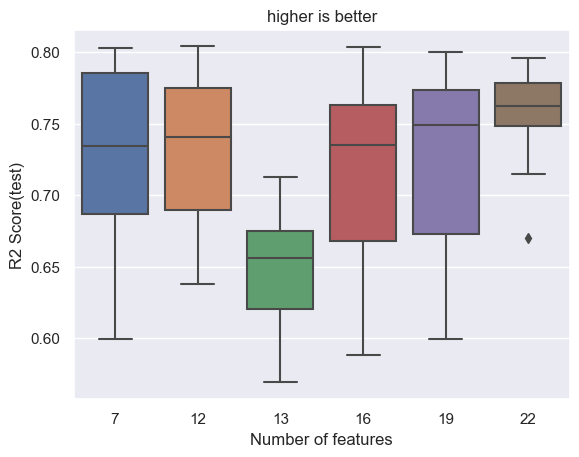

In [33]:
ax = sns.boxplot(data=clean_DT_df,y='R2 Score(test)',x='Number of features')
ax.set(title='higher is better');

=> no ft = 13 vẫn bị ảo giác

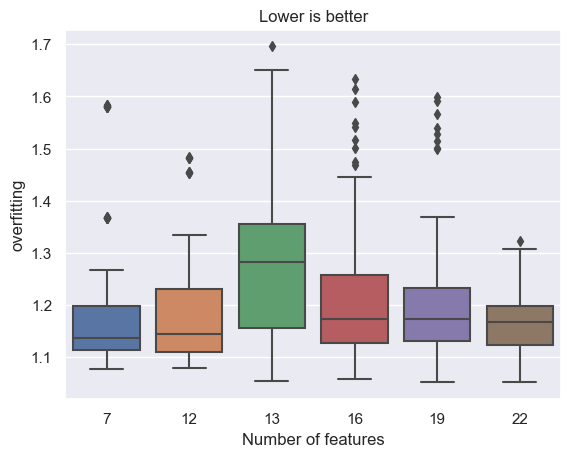

In [25]:
ax = sns.boxplot(data=clean_DT_df,y='overfitting',x='Number of features')
ax.set(title='Lower is better');

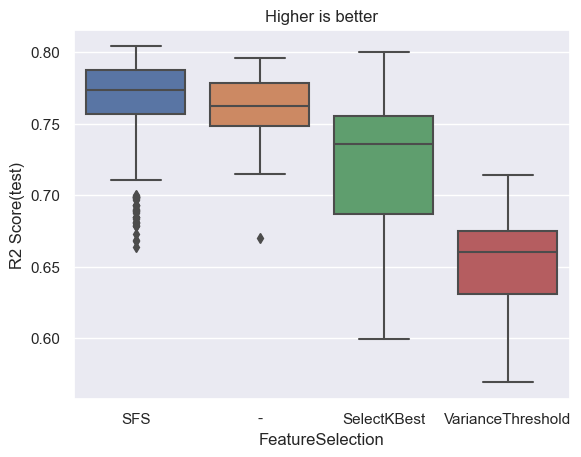

In [34]:
ax = sns.boxplot(data=clean_DT_df,y='R2 Score(test)',x='FeatureSelection')
ax.set(title='Higher is better',xlabel='FeatureSelection');

Tương đồng với R2 Score(test):

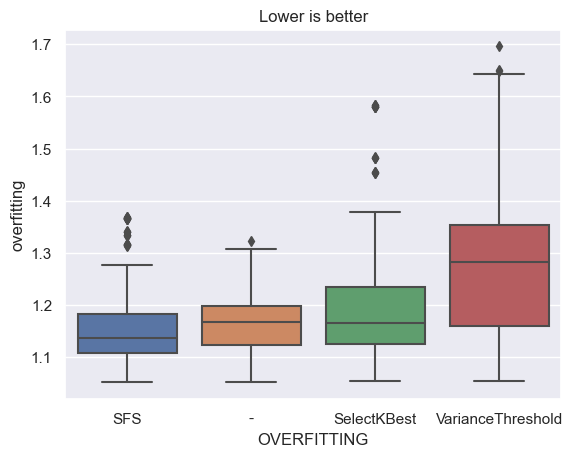

In [29]:
ax = sns.boxplot(data=clean_DT_df,y='overfitting',x='FeatureSelection')
ax.set(title='Lower is better',xlabel='OVERFITTING');

=> SFS is the best selection in both of Score and Overfitting

=> VarianceThreshold is always worst

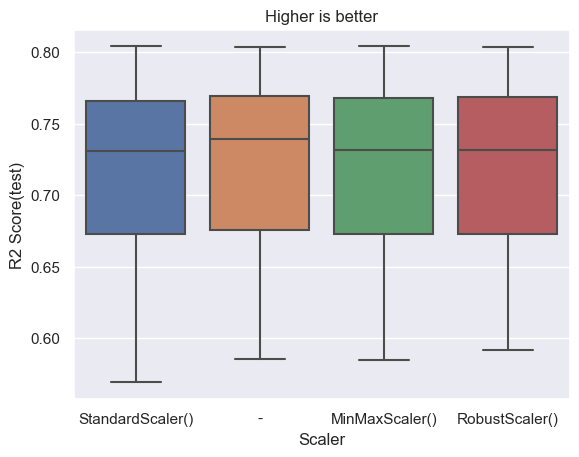

In [30]:
ax = sns.boxplot(data=clean_DT_df,y='R2 Score(test)',x='Scaler')
ax.set(title='Higher is better');

=> việc Scale không ảnh hưởng quá nhiều đến hiệu suất mô hình, thậm chí còn tệ hơn 1 chút so với không Scale

# Random Forest Regression

**Parameters**:
* n_estimators: default = 100: số lượng trees của forest
* criterion
* max_depth
* min_samples_split
* min_samples_leaf
* bootstrap: default = True: sử dụng bootstrap, False: sử dụng toàn bộ dataset để build mỗi cây

In [376]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=random_state)
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model   FeatureSelection            Scaler  \
37  RandomForestRegressor                SFS    RobustScaler()   
35  RandomForestRegressor                SFS    MinMaxScaler()   
36  RandomForestRegressor                SFS  StandardScaler()   
34  RandomForestRegressor                SFS                 -   
29  RandomForestRegressor                SFS    RobustScaler()   
27  RandomForestRegressor                SFS    MinMaxScaler()   
28  RandomForestRegressor                SFS  StandardScaler()   
26  RandomForestRegressor                SFS                 -   
45  RandomForestRegressor                SFS    RobustScaler()   
43  RandomForestRegressor                SFS    MinMaxScaler()   
42  RandomForestRegressor                SFS                 -   
44  RandomForestRegressor                SFS  StandardScaler()   
16  RandomForestRegressor        SelectKBest  StandardScaler()   
15  RandomForestRegressor        SelectKBest    MinMaxScaler()   
14  RandomForestRegressor        SelectKBest                 -   
21  RandomForestRegressor                SFS    RobustScaler()   
18  RandomForestRegressor                SFS                 -   
20  RandomForestRegressor                SFS  StandardScaler()   
19  RandomForestRegressor                SFS    MinMaxScaler()   
1   RandomForestRegressor                  -                 -   
17  RandomForestRegressor        SelectKBest    RobustScaler()   
24  RandomForestRegressor        SelectKBest  StandardScaler()   
23  RandomForestRegressor        SelectKBest    MinMaxScaler()   
25  RandomForestRegressor        SelectKBest    RobustScaler()   
22  RandomForestRegressor        SelectKBest                 -   
32  RandomForestRegressor        SelectKBest  StandardScaler()   
33  RandomForestRegressor        SelectKBest    RobustScaler()   
30  RandomForestRegressor        SelectKBest                 -   
31  RandomForestRegressor        SelectKBest    MinMaxScaler()   
40  RandomForestRegressor        SelectKBest  StandardScaler()   
41  RandomForestRegressor        SelectKBest    RobustScaler()   
38  RandomForestRegressor        SelectKBest                 -   
39  RandomForestRegressor        SelectKBest    MinMaxScaler()   
4   RandomForestRegressor  VarianceThreshold  StandardScaler()   
13  RandomForestRegressor  VarianceThreshold    RobustScaler()   
10  RandomForestRegressor  VarianceThreshold                 -   
2   RandomForestRegressor  VarianceThreshold                 -   
8   RandomForestRegressor  VarianceThreshold  StandardScaler()   
12  RandomForestRegressor  VarianceThreshold  StandardScaler()   
6   RandomForestRegressor  VarianceThreshold                 -   
7   RandomForestRegressor  VarianceThreshold    MinMaxScaler()   
5   RandomForestRegressor  VarianceThreshold    RobustScaler()   
9   RandomForestRegressor  VarianceThreshold    RobustScaler()   
11  RandomForestRegressor  VarianceThreshold    MinMaxScaler()   
3   RandomForestRegressor  VarianceThreshold    MinMaxScaler()   

   Number of features           Rmse R2 Score(train) R2 Score(test)  
37                 12  139214.932343          0.9834         0.8718  
35                 12  139281.053054         0.98335       0.871679  
36                 12  139295.167411        0.983351       0.871653  
34                 12  139296.374155        0.983348        0.87165  
29                 16  140444.158419        0.983319       0.869526  
27                 16   140462.32634        0.983271       0.869493  
28                 16  140533.333868        0.983261       0.869361  
26                 16  140546.810522        0.983259       0.869336  
45                  7  141628.642445        0.982324       0.867316  
43                  7  141645.769591        0.982323       0.867284  
42                  7  141709.900116        0.982317       0.867164  
44                  7  141762.440914        0.982315       0.867066  
16                 19  145018.611686        0.982639       0.860889  
15 

In [48]:
model = RandomForestRegressor(random_state=random_state)

param_grid = {
    'max_depth': [None, 10,20,30],
    'min_samples_split': [None,20,30,40],
    'min_samples_leaf' : [None,2,3,4,5,6],
    'n_estimators' : [None,10,20,50,100]
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,scoring = 'r2',n_jobs=10)

grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
269       9.894799      0.047436         0.067400    4.894933e-04   
29        9.920396      0.042377         0.068800    3.999472e-04   
389       9.958401      0.116855         0.068199    4.005216e-04   
268       4.964001      0.024356         0.035000    5.519789e-07   
28        4.960799      0.031908         0.036000    6.319616e-04   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
269              20                      2                      20   
29             None                      2                      20   
389              30                      2                      20   
268              20                      2                      20   
28             None                      2                      20   

    param_n_estimators                                             params  \
269                100  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...   
29                 100  {'max_depth': None, 'min_samples_leaf': 2, 'mi...   
389                100  {'max_depth': 30, 'min_samples_leaf': 2, 'min_...   
268                 50  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...   
28                  50  {'max_depth': None, 'min_samples_leaf': 2, 'mi...   

     split0_test_score  split1_test_score  split2_test_score  \
269           0.852368           0.863329           0.872088   
29            0.851055           0.863444           0.871760   
389           0.851055           0.863444           0.871760   
268           0.849455           0.862849           0.871261   
28            0.848892           0.863016           0.871310   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
269           0.881210           0.864642         0.866727        0.009598   
29            0.881591           0.864496         0.866469        0.010073   
389           0.881591           0.864496         0.866469        0.010073   
268           0.881098           0.863261         0.865585        0.010449   
28            0.881458           0.862840         0.865503        0.010747   

     rank_test_score  
269                1  
29                 2  
389                3  
268                4  
28                 5

In [51]:
#best
model = RandomForestRegressor(random_state=random_state,n_estimators = 100,max_depth=20,min_samples_leaf=2,min_samples_split=20,n_jobs=5 )
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
43  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
45  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
27  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
29  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
42  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
44  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
26  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
28  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
37  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
35  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
34  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
36  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
21  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
19  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
18  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
20  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
14  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
16  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
17  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
15  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
1   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
22  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
23  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
25  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
24  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
32  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
30  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
33  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
31  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
38  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
40  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
41  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
39  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
2   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
4   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
3   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
5   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
6   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
8   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
9   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
7   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
10  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
13  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
11  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
12  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   

     FeatureSelection            Scaler Number of features           Rmse  \
43                SFS    MinMaxScaler()                  7  142285.099062   
45                SFS    RobustScaler()                  7  142286.503902   
27                SFS    MinMaxScaler()                 16  142333.830629   
29                SFS    Robust

In [53]:
# second
model = RandomForestRegressor(random_state=random_state,n_estimators = 100,min_samples_leaf=2,min_samples_split=20,n_jobs=15 )
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
45  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
43  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
42  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
44  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
29  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
27  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
26  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
28  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
21  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
19  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
18  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
20  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
37  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
35  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
34  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
36  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
15  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
17  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
14  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
16  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
1   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
22  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
24  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
23  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
25  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
32  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
30  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
33  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
31  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
38  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
40  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
41  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
39  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
5   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
3   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
4   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
2   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
8   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
9   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
7   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
6   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
11  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
10  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
13  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
12  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   

     FeatureSelection            Scaler Number of features           Rmse  \
45                SFS    RobustScaler()                  7  142271.129893   
43                SFS    MinMaxScaler()                  7  142273.148252   
42                SFS                 -                  7  142351.673642   
44                SFS  Standard

In [55]:
# third
model = RandomForestRegressor(random_state=random_state,n_estimators = 100,max_depth=30,min_samples_leaf=2,min_samples_split=20,n_jobs=15 )
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
45  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
43  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
42  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
44  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
29  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
27  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
26  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
28  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
21  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
19  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
18  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
20  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
37  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
35  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
34  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
36  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
15  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
17  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
14  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
16  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
1   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
22  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
24  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
23  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
25  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
32  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
30  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
33  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
31  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
38  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
40  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
41  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
39  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
5   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
3   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
4   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
2   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
8   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
9   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
7   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
6   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
11  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
10  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
13  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
12  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   

     FeatureSelection            Scaler Number of features           Rmse  \
45                SFS    RobustScaler()                  7  142270.996313   
43                SFS    MinMaxScaler()                  7  142273.017816   
42                SFS                 -                  7  142351.540126   
44                SFS  Standard

In [56]:
# fourth
model = RandomForestRegressor(random_state=random_state,n_estimators = 50,max_depth=20,min_samples_leaf=2,min_samples_split=20,n_jobs=5 )
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
35  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
37  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
34  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
36  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
29  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
27  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
28  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
26  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
21  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
19  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
18  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
43  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
20  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
45  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
44  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
42  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
16  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
15  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
17  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
14  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
1   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
22  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
24  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
23  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
25  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
32  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
30  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
33  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
31  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
38  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
41  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
40  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
39  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
4   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
3   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
5   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
2   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
8   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
7   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
6   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
9   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
10  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
13  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
12  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
11  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   

     FeatureSelection            Scaler Number of features           Rmse  \
35                SFS    MinMaxScaler()                 12  136581.188129   
37                SFS    RobustScaler()                 12  136595.692176   
34                SFS                 -                 12   136808.58466   
36                SFS  Standard

In [67]:
#not = 20
model = RandomForestRegressor(random_state=random_state,n_estimators = 20,max_depth=20,min_samples_leaf=2,min_samples_split=20,n_jobs=5 )
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
45  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
43  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
42  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
44  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
37  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
35  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
34  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
36  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
29  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
28  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
26  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
27  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
21  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
20  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
18  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
19  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
14  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
15  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
17  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
16  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
1   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
24  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
22  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
23  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
25  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
31  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
30  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
32  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
33  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
38  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
40  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
41  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
39  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
2   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
5   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
4   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
3   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
7   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
8   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
9   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
6   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
11  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
13  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
10  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
12  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   

     FeatureSelection            Scaler Number of features           Rmse  \
45                SFS    RobustScaler()                  7  140438.264092   
43                SFS    MinMaxScaler()                  7  140465.086719   
42                SFS                 -                  7  140490.510545   
44                SFS  Standard

In [78]:
#not = 300
model = RandomForestRegressor(random_state=random_state,n_estimators = 300,max_depth=20,min_samples_leaf=2,min_samples_split=20,n_jobs=25 )
rate_model(model)

Progress: [======================] 100.00%	Done num_feat = 7!

Model                                             Params  \
43  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
45  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
42  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
44  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
21  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
29  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
19  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
27  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
26  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
20  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
18  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
28  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
37  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
35  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
34  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
36  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
16  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
15  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
17  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
14  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
1   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
24  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
22  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
23  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
25  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
32  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
33  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
31  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
30  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
40  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
41  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
39  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
38  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
3   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
2   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
5   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
4   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
6   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
7   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
8   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
9   RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
11  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
13  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
10  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
12  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   

     FeatureSelection            Scaler Number of features           Rmse  \
43                SFS    MinMaxScaler()                  7  141395.965903   
45                SFS    RobustScaler()                  7  141397.080999   
42                SFS                 -                  7  141463.469255   
44                SFS  Standard

In [79]:
RF_df = pd.read_csv("exp/RandomForestRegressor.csv")
clean_RF_df = RF_df.drop_duplicates()
clean_RF_df.sort_values(by='R2 Score(test)',ascending=False)
clean_RF_df['min_samples_split'] = clean_RF_df['Params'].str.extract(r"'min_samples_split': (\d+)")
clean_RF_df['min_samples_leaf'] = clean_RF_df['Params'].str.extract(r"'min_samples_leaf': (\d+)")
clean_RF_df['num_of_trees'] = clean_RF_df['Params'].str.extract(r"'n_estimators': (\d+)")
clean_RF_df['overfitting'] = clean_RF_df['R2 Score(train)']/clean_RF_df['R2 Score(test)']
clean_RF_df = clean_RF_df.drop('Params', axis=1)
clean_RF_df.sort_values(by='R2 Score(test)',ascending=False)

Model   FeatureSelection            Scaler  \
360  RandomForestRegressor                SFS    MinMaxScaler()   
361  RandomForestRegressor                SFS    RobustScaler()   
362  RandomForestRegressor                SFS                 -   
363  RandomForestRegressor                SFS  StandardScaler()   
0    RandomForestRegressor                SFS    RobustScaler()   
..                     ...                ...               ...   
44   RandomForestRegressor  VarianceThreshold    MinMaxScaler()   
491  RandomForestRegressor  VarianceThreshold    MinMaxScaler()   
492  RandomForestRegressor  VarianceThreshold                 -   
493  RandomForestRegressor  VarianceThreshold    RobustScaler()   
494  RandomForestRegressor  VarianceThreshold  StandardScaler()   

     Number of features           Rmse  R2 Score(train)  R2 Score(test)  \
360                  12  136581.188129         0.929792        0.876605   
361                  12  136595.692176         0.929820        0.876579   
362                  12  136808.584660         0.929795        0.876194   
363                  12  136821.096316         0.929791        0.876171   
0                    12  139214.932343         0.983400        0.871800   
..                  ...            ...              ...             ...   
44                   19  194541.053353         0.973165        0.749656   
491                  13  195957.574555         0.879736        0.745997   
492                  13  196021.945538         0.879819        0.745830   
493                  13  196036.070243         0.879696        0.745793   
494                  13  196088.232616         0.879760        0.745658   

    min_samples_split min_samples_leaf num_of_trees  overfitting  
360                20                2           50     1.060674  
361                20                2           50     1.060737  
362                20                2           50     1.061175  
363                20                2           50     1.061197  
0                 NaN              NaN          NaN     1.128011  
..                ...              ...          ...          ...  
44                NaN              NaN          NaN     1.298150  
491                20                2           10     1.179276  
492                20                2           10     1.179650  
493                20                2           10     1.179544  
494                20                2           10     1.179844  

[495 rows x 11 columns]

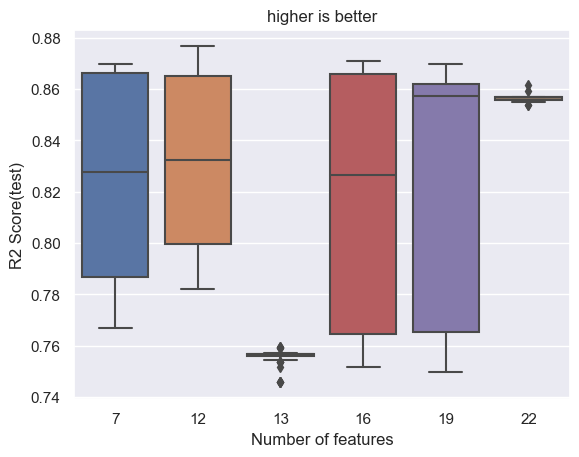

In [80]:
ax = sns.boxplot(data=clean_RF_df,y='R2 Score(test)',x='Number of features')
ax.set(title='higher is better');


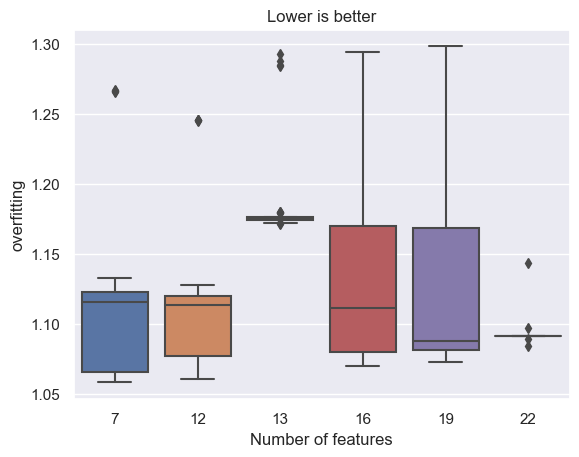

In [81]:
ax = sns.boxplot(data=clean_RF_df,y='overfitting',x='Number of features')
ax.set(title='Lower is better');

<span style="color: green; font-size: 24px;">&#10004;</span> Loại bỏ càng ít ft thì kết quả tốt nhất, overfitting cũng thấp nhất


<span style="color:red">&#10060;</span> 13 fts vẫn ảo giác

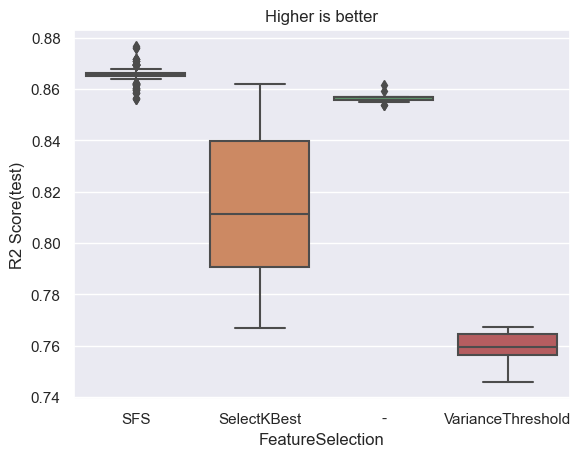

In [82]:
ax = sns.boxplot(data=clean_RF_df,y='R2 Score(test)',x='FeatureSelection')
ax.set(title='Higher is better',xlabel='FeatureSelection');

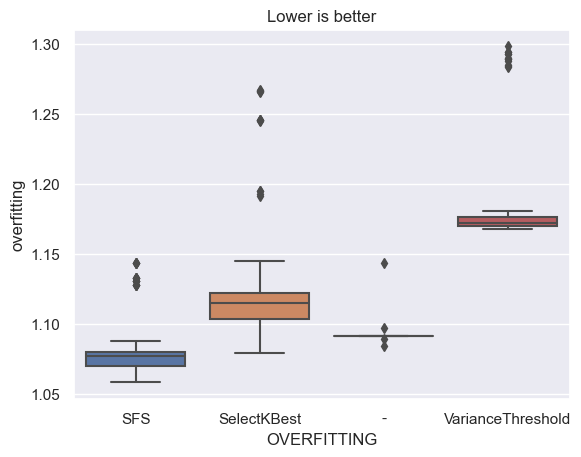

In [88]:
ax = sns.boxplot(data=clean_RF_df,y='overfitting',x='FeatureSelection')
ax.set(title='Lower is better',xlabel='OVERFITTING');

<span style="color:red">&#10060;</span>: varianceThreshold vẫn là tệ nhất

<span style="color: green; font-size: 24px;">&#10004;</span>  : Nếu áp dụng feature selection thì nên áp dụng SFS

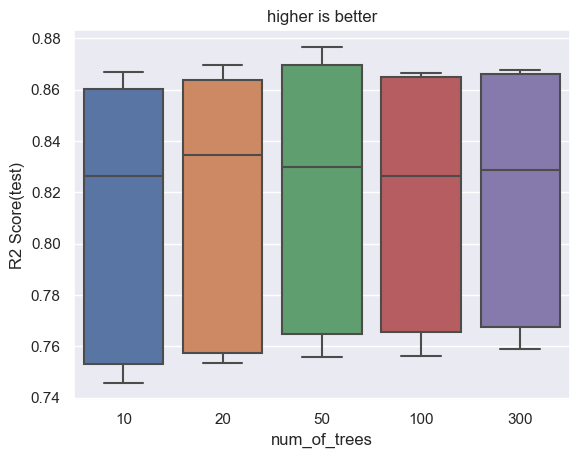

In [91]:
ax = sns.boxplot(data=clean_RF_df,y='R2 Score(test)',x='num_of_trees',order=['10','20','50','100','300'])
ax.set(title='higher is better');

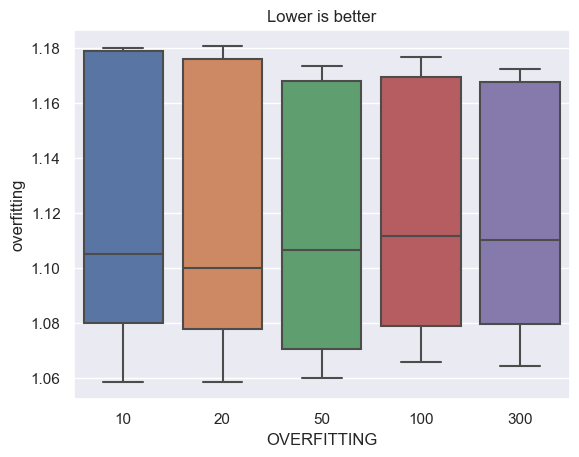

In [93]:
ax = sns.boxplot(data=clean_RF_df,y='overfitting',x='num_of_trees',order=['10','20','50','100','300'])
ax.set(title='Lower is better',xlabel='OVERFITTING');

💡 Num of trees nhiều hay ít cũng chỉ làm thay đổi 1 chút, không đáng kể
